# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import platform

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)

In [2]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [3]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'

In [4]:
if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Laser Data/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "Recordings2\\SubSet\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'Recordings2/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'Recordings2\\'

In [5]:
print(Computer, folder, rootfolder)

SciClone /sciclone/scr10/dchendrickson01/Laser Data/ /sciclone/home20/dchendrickson01/


In [6]:
#Extra Headers:
import os as os
import statistics as st
import random
#import multiprocessing
#from joblib import Parallel, delayed
import time
import CoreFunctions as cf
import pywt

my_cmap = plt.get_cmap('gray')

In [7]:
#DataSet = np.genfromtxt(open('./Data/Jeep SD 10.txt','r'), delimiter=',',skip_header=4)
Header = np.array(['Top1', 'Top2','Top3']) #','Z1','X2','Y2','Z2'])
#Header = np.array(['Date', 'Hour', 'Minute', 'Second', 'Sec Fraction', 'Sen0x', 'Sen0y', 'Sen0z', 'Sen1x', 'Sen1y', 'Sen1z', 'Sen2x', 'Sen2y', 'Sen2z', 'Sen3x', 'Sen3y', 'Sen3z', 'Sen4x', 'Sen4y', 'Sen4z', 'Sen5x', 'Sen5y', 'Sen5z'])


fig=plt.figure(figsize=(6.67,3.75))
plt.plot(DataSet[:,0],DataSet[:,1], label = 'X')
plt.plot(DataSet[:,0],DataSet[:,2], label = 'Y')
plt.plot(DataSet[:,0],DataSet[:,3], label = 'Z')
plt.plot(DataSet[:,0],DataSet[:,4], label = 'R')

title = '4 Magnitude Acceleration Curves'
if Ledgends: plt.legend()
if Titles: plt.title(title)
if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
plt.show()

def PlotFingerPrint(data, xName='a', title='', FP='mexh',scales = 50, slices=10, trim=0):
    
    FpScat=fp.getLabeledThumbprint(data, FP,scales,slices)
    #print(np.shape(data)[1], scales)
    if xName == 'a':
        xName = np.arange(0,np.shape(FpScat)[1]-2*trim,1)
    if trim == 0:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))
    else:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))

    

    fig1 = plt.figure(figsize=(6.67,3.75), dpi=600)
    ax1 = plt.axes()
    if trim == 0:
        cs1 = ax1.contourf(Al,Ms, FpScat[:,:],cmap=my_cmap,levels=slices)
    else:
        cs1 = ax1.contourf(Al,Ms, FpScat[:,trim:-trim],cmap=my_cmap,levels=slices)

    if Titles: plt.title(title)
    if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "").replace(".txt","")+FFormat)

    plt.show()

In [8]:
# Directory = './Data'
#Directory = 'C:\\Users\\Dan\\Desktop\\Temp\\'
#Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
files = os.listdir(folder)

#files = random.sample(files,2)

# Reorder_cycler = (cycler('color', ['0.00', '0.70', '0.40', '0.90']) + cycler(linestyle=['-', '--', ':', '-.']))
# plt.rc('axes', prop_cycle=Reorder_cycler)

#start = 1538500
#end  =   start + 5000 #1649552
#start = 54000
#end = 56000
start = 0
end = 160000

size = 5000
Arange = 10
coord = 2

Saving = True
#location = Directory
Titles = True

In [9]:
for i in range(len(files)):
    print(i,files[i])

0 stack 27 moving away rom close.csv
1 Satck 25 starting to hoist.csv
2 stack 27 accelerating out of tz.csv
3 Stack 25 accelerating away end of transfer zone.csv
4 stack 25 leaving waterside transfer 1.csv
5 Stack 25 both cranes moving away, half speed by center anchor.csv
6 stack 27 bar impacting 20 foot contaienr.csv
7 Stack 25 empty bar hoist down in transfer zone.csv
8 stack 25 spreader hitting container.csv
9 Stack 25 full speed towards me, 200 foot away, noise in track.csv
10 stack 27 slowly entering tz.csv
11 Stack 25 hoisting up.csv
12 stack 27 coming towards and slowing down 2.csv
13 Stack 25 leaving waterside transfer.csv
14 stack 27 accelerating out of tz 3.csv
15 Stack 26 both cranes moving toward, halfway down track.csv
16 stack 27 both cranes moving fast away.csv
17 top and end - enter tz.csv
18 Stack 26 far crane moving near crane half way down stack stationary.csv
19 stack 27 coming towards and slowing down.csv
20 Stack 26 stationary crane far down track.csv
21 stack 27

In [10]:
WvltFam = pywt.families()
Wvlts = []
for Fam in WvltFam:
    temp = pywt.wavelist(Fam)
    for wvlt in temp:
        Wvlts.append(wvlt)
Wvlts.append('beta')        
print(Wvlts)

['haar', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'dmey', 'gaus1', 'gaus2', 'gaus3', 'gaus4'

In [11]:
location = '/sciclone/scr10/dchendrickson01/LaserPrints3/'

stime = time.time()

chunkSize=5000

#for file in files[:9]:
def fileImages(file, wvlt):
    if file[-4:] ==  '.csv':
        try:
            ODataSet = np.genfromtxt(open(folder+'/'+file,'r'), delimiter=',',skip_header=1)
    
            ODataSet = ODataSet[:,2:4]

            for coord in range(2):
                for j in range(np.shape(ODataSet)[0]-1):
                    try:
                        ODataSet[j,coord] = float(ODataSet[j,coord])
                    except:
                        ODataSet[j,coord] = ODataSet[j-1,coord]
                    if ODataSet[j,coord] == -999.999:
                        ODataSet[j,coord] = ODataSet[j-1,coord]

            Diffs = np.zeros(np.shape(ODataSet)[0])
            for j in range(np.shape(ODataSet)[0]-1):
                Diffs[j] = ODataSet[j,0] - ODataSet[j,1]
            norm = np.average(ODataSet[:,0])
            ODataSet[:,0]-=norm
            norm = np.average(ODataSet[:,1])
            ODataSet[:,1]-=norm
            norm = np.average(Diffs)
            Diffs[:]-=norm

            CleanDiff = cf.Smoothing(Diffs,2)
            Clean0 = cf.Smoothing(ODataSet[:,0],2)
            Clean1 = cf.Smoothing(ODataSet[:,1],2)

            for i in range(int(len(CleanDiff)/chunkSize)):
                start = i*chunkSize
                end = start+chunkSize-1

                fprint = cf.getThumbprint2(CleanDiff[start:end], wvlt, 500,10)
                cf.PlotFingerPrint(fprint.T, 'Channel Differences '+wvlt + file + ' at ' + str(start), location, True, Show=False)

                fprint = cf.getThumbprint2(Clean0[start:end], wvlt, 500, 10)
                cf.PlotFingerPrint(fprint.T, 'Channel 0 '+wvlt + file + ' at ' + str(start), location, True, Show=False)

                fprint = cf.getThumbprint2(Clean1[start:end], wvlt, 500, 10)
                cf.PlotFingerPrint(fprint.T, 'Channel 1 '+wvlt+ + file + ' at ' + str(start), location, True, Show=False)
        except:
            print(file)
    
    return 0
    

In [12]:
import multiprocessing
from joblib import Parallel, delayed

In [13]:
#nothiing = Parallel(n_jobs=30)(delayed(fileImages)(file) for file in files)

In [14]:
print('Done')
i = 116
file =files[i]

Done


In [15]:
# make all wavelets one file
ODataSet = np.genfromtxt(open(folder+'/'+file,'r'), delimiter=',',skip_header=1)
    
ODataSet = ODataSet[:,2:4]

In [16]:
for coord in range(2):
    for j in range(np.shape(ODataSet)[0]-1):
        try:
            ODataSet[j,coord] = float(ODataSet[j,coord])
        except:
            ODataSet[j,coord] = ODataSet[j-1,coord]
        if ODataSet[j,coord] == -999.999:
            ODataSet[j,coord] = ODataSet[j-1,coord]

Diffs = np.zeros(np.shape(ODataSet)[0])
for j in range(np.shape(ODataSet)[0]-1):
    Diffs[j] = ODataSet[j,0] - ODataSet[j,1]

norm = np.average(ODataSet[:,0])
ODataSet[:,0]-=norm
norm = np.average(ODataSet[:,1])
ODataSet[:,1]-=norm
norm = np.average(Diffs)
Diffs[:]-=norm

CleanDiff = cf.Smoothing(Diffs,0)
Clean0 = cf.Smoothing(ODataSet[:,0],0)
Clean1 = cf.Smoothing(ODataSet[:,1],0)


In [17]:
wvlt = 'db4'
Fdpi = 300
scales=500


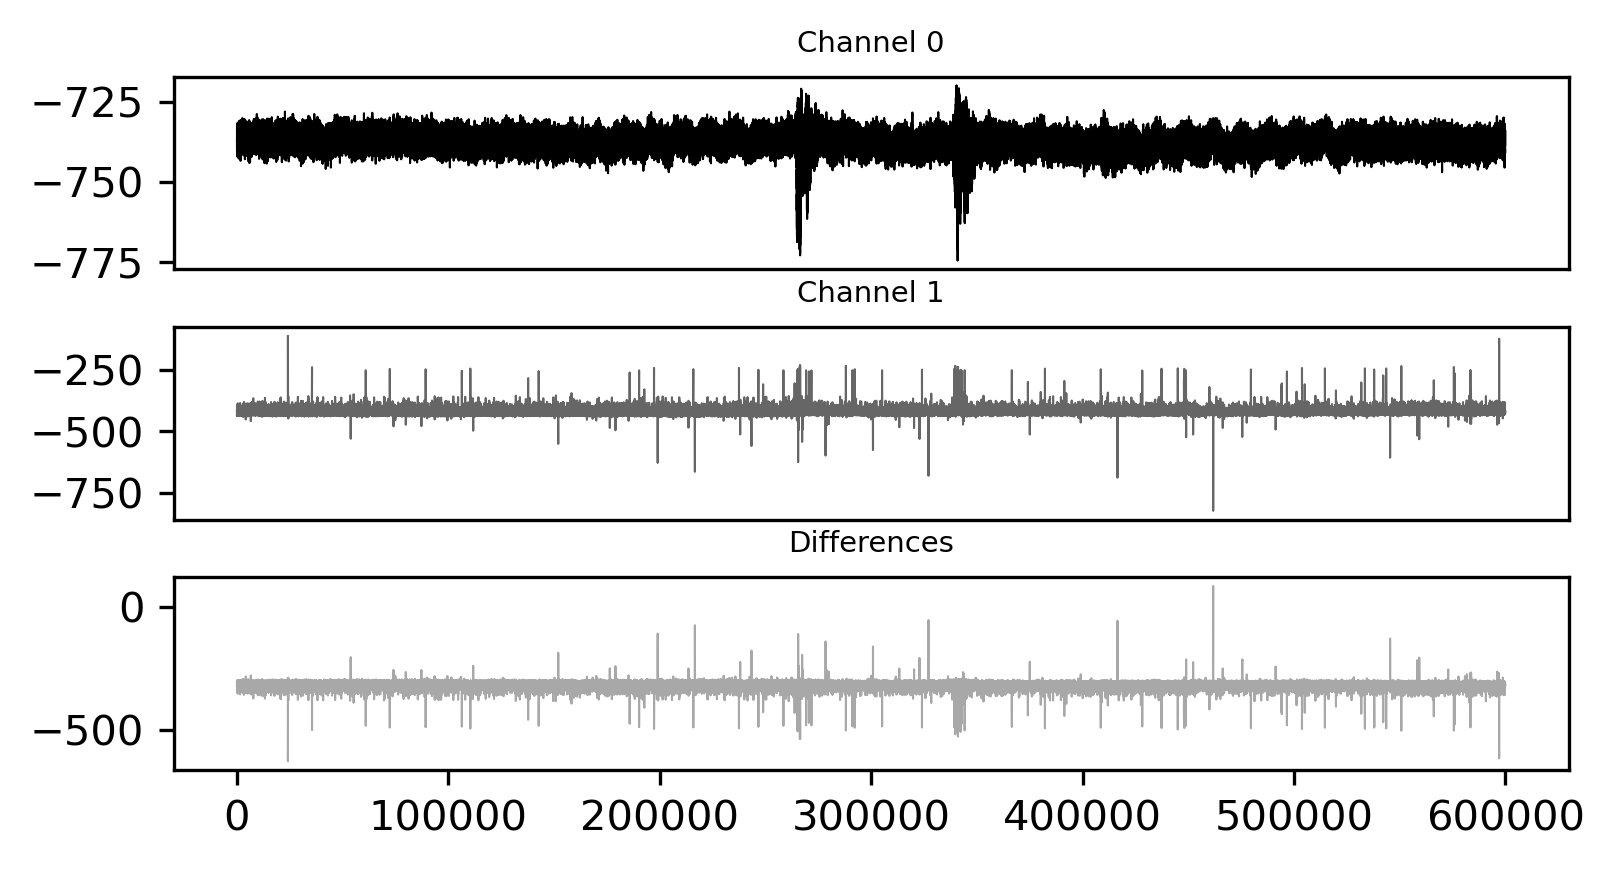

In [18]:
fig,axs = plt.subplots(3,figsize=(6,3), dpi=Fdpi)
plt.subplots_adjust(hspace=0.3)
axs[0].plot(Clean0[25:-50], label='Channel 0',linewidth=0.5)
axs[0].set_title('Channel 0', fontsize=7)
axs[0].set_xticks([])
axs[1].plot(Clean1[25:-50], label='Channel 1',linewidth=0.5, color='0.4')
axs[1].set_title('Channel 1', fontsize=7)
axs[1].set_xticks([])
axs[2].plot(CleanDiff[25:-50], label='Differences',linewidth=0.5,color='0.66')
axs[2].set_title('Differences', fontsize=7)
plt.show()

In [19]:
fprintD = cf.getThumbprint2(CleanDiff, wvlt, scales,2)
fprint0 = cf.getThumbprint2(Clean0, wvlt, scales, 2)
fprint1 = cf.getThumbprint2(Clean1, wvlt, scales, 2)


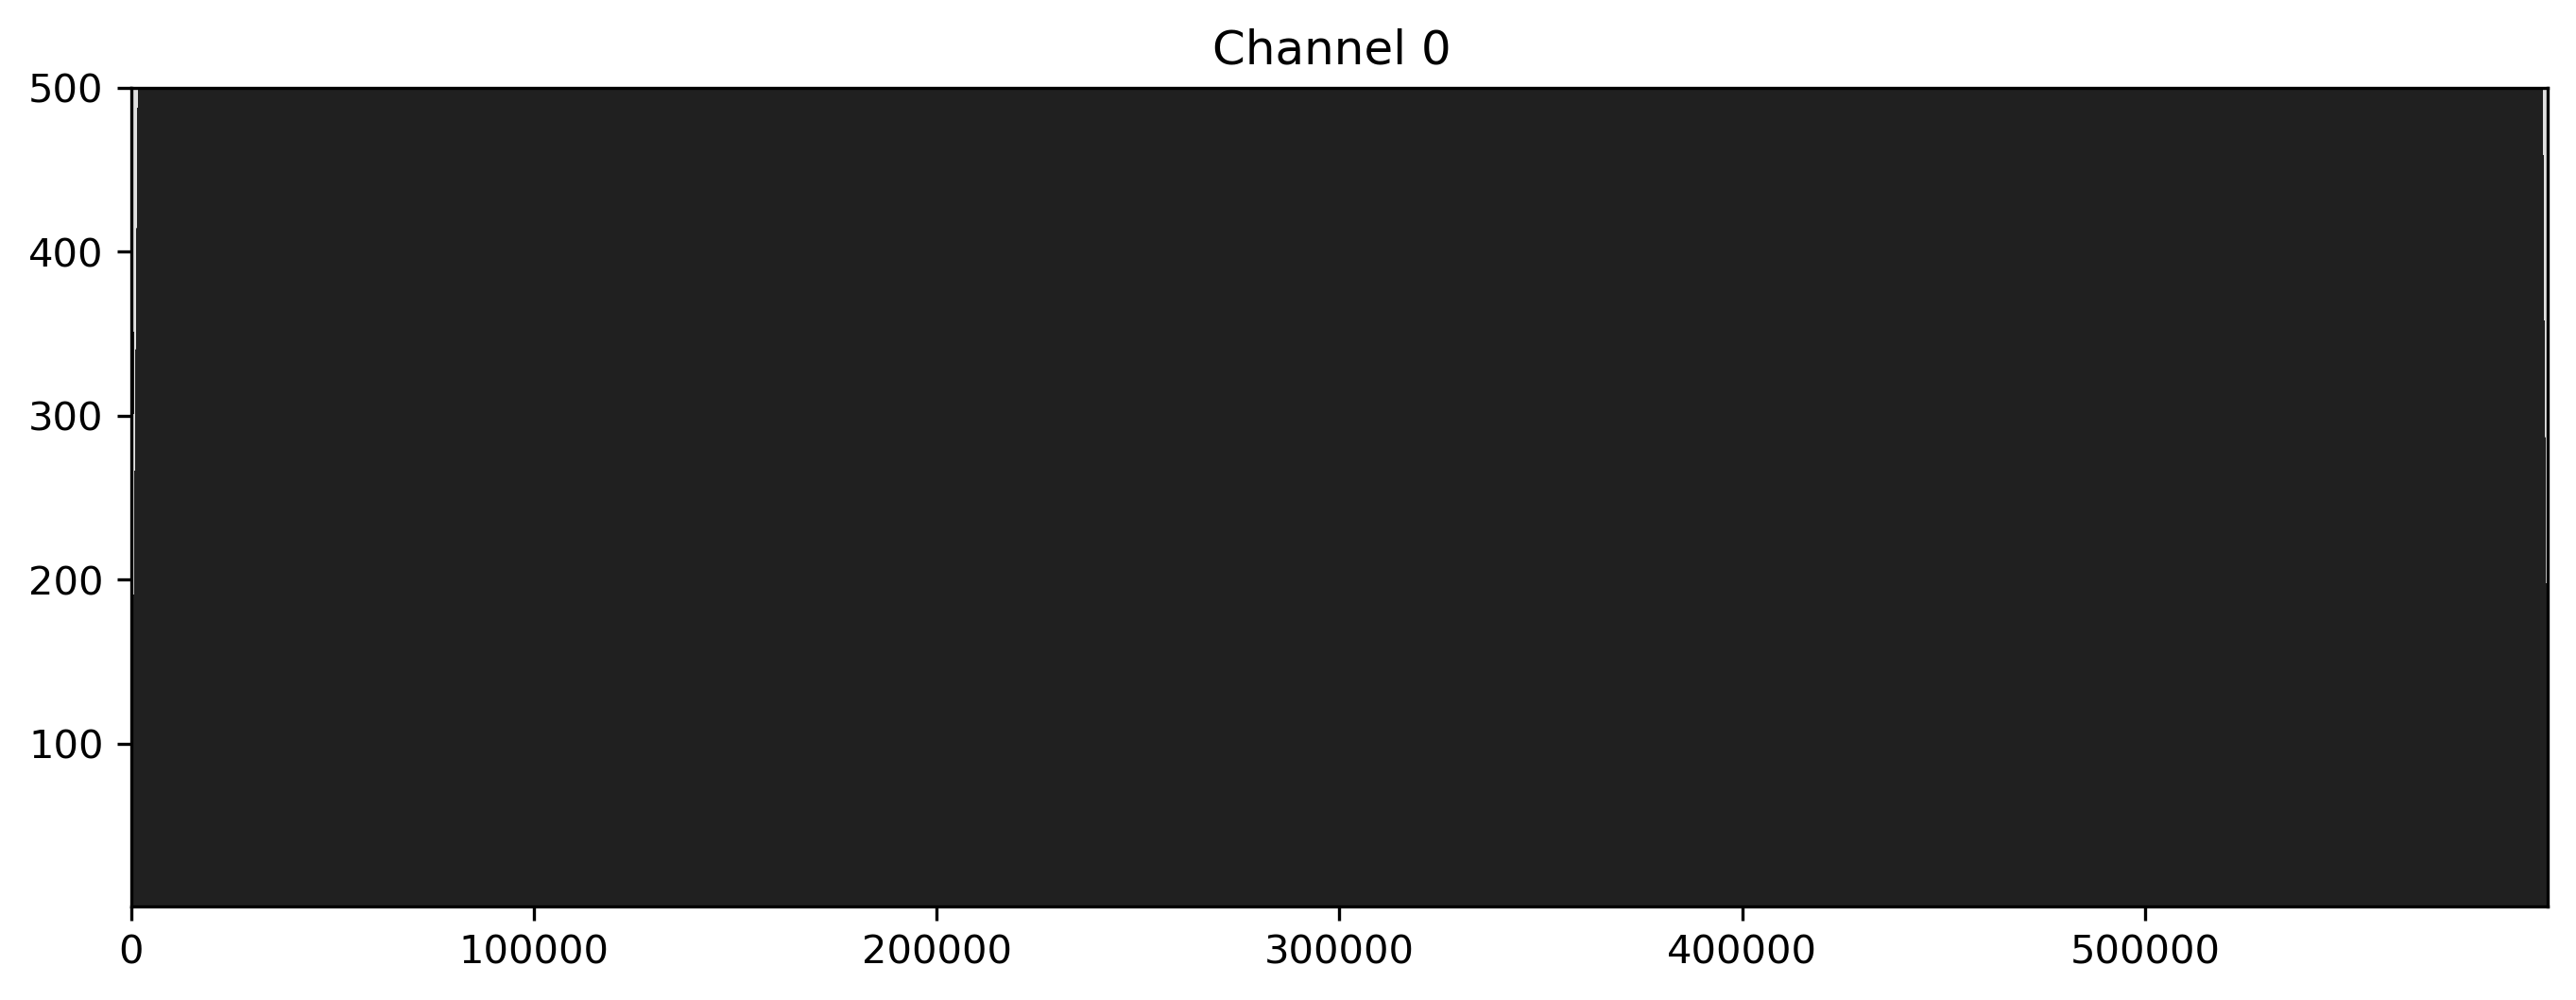

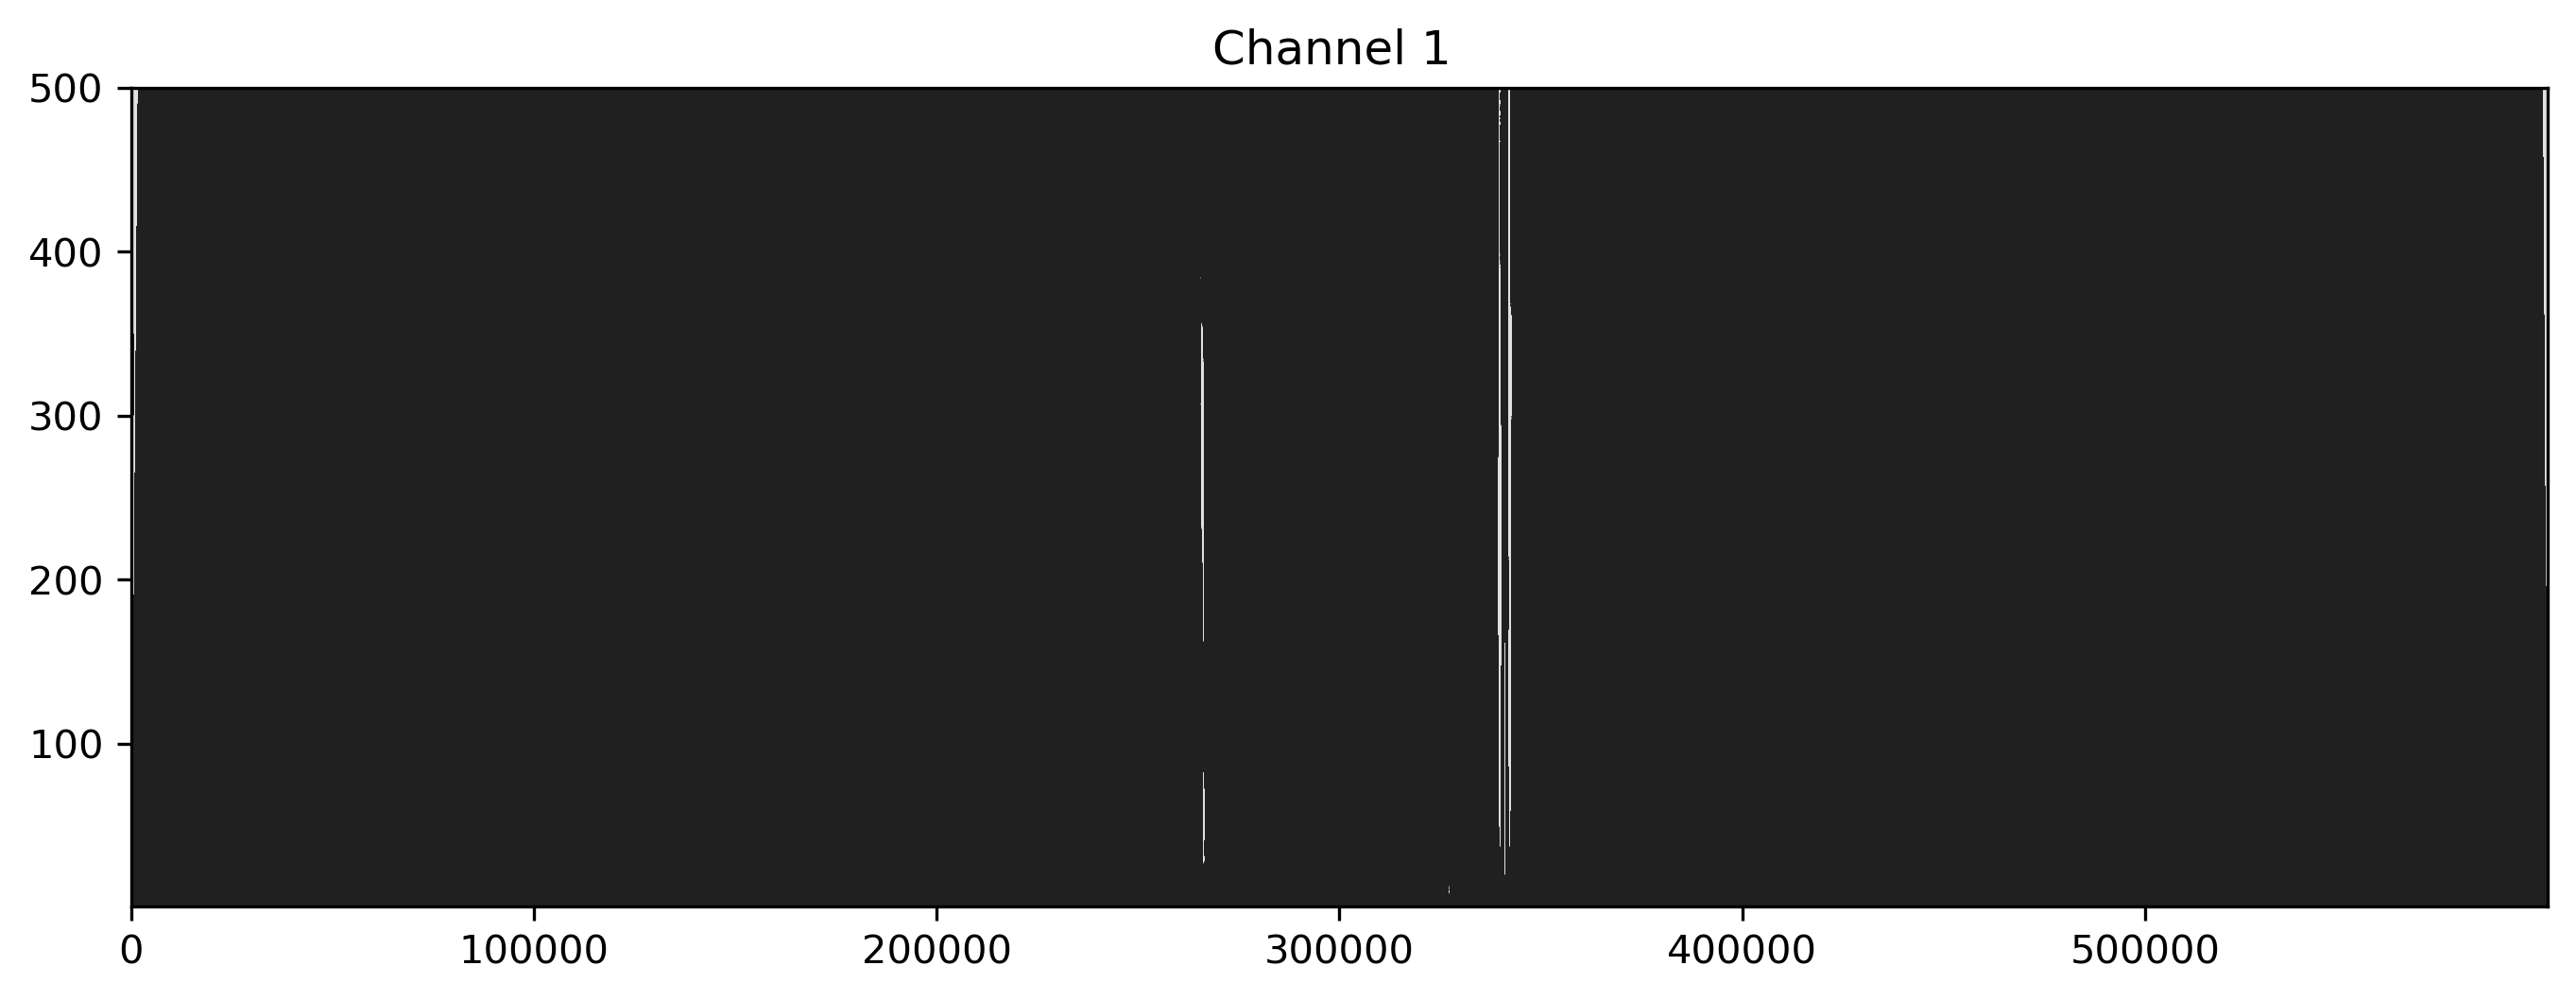

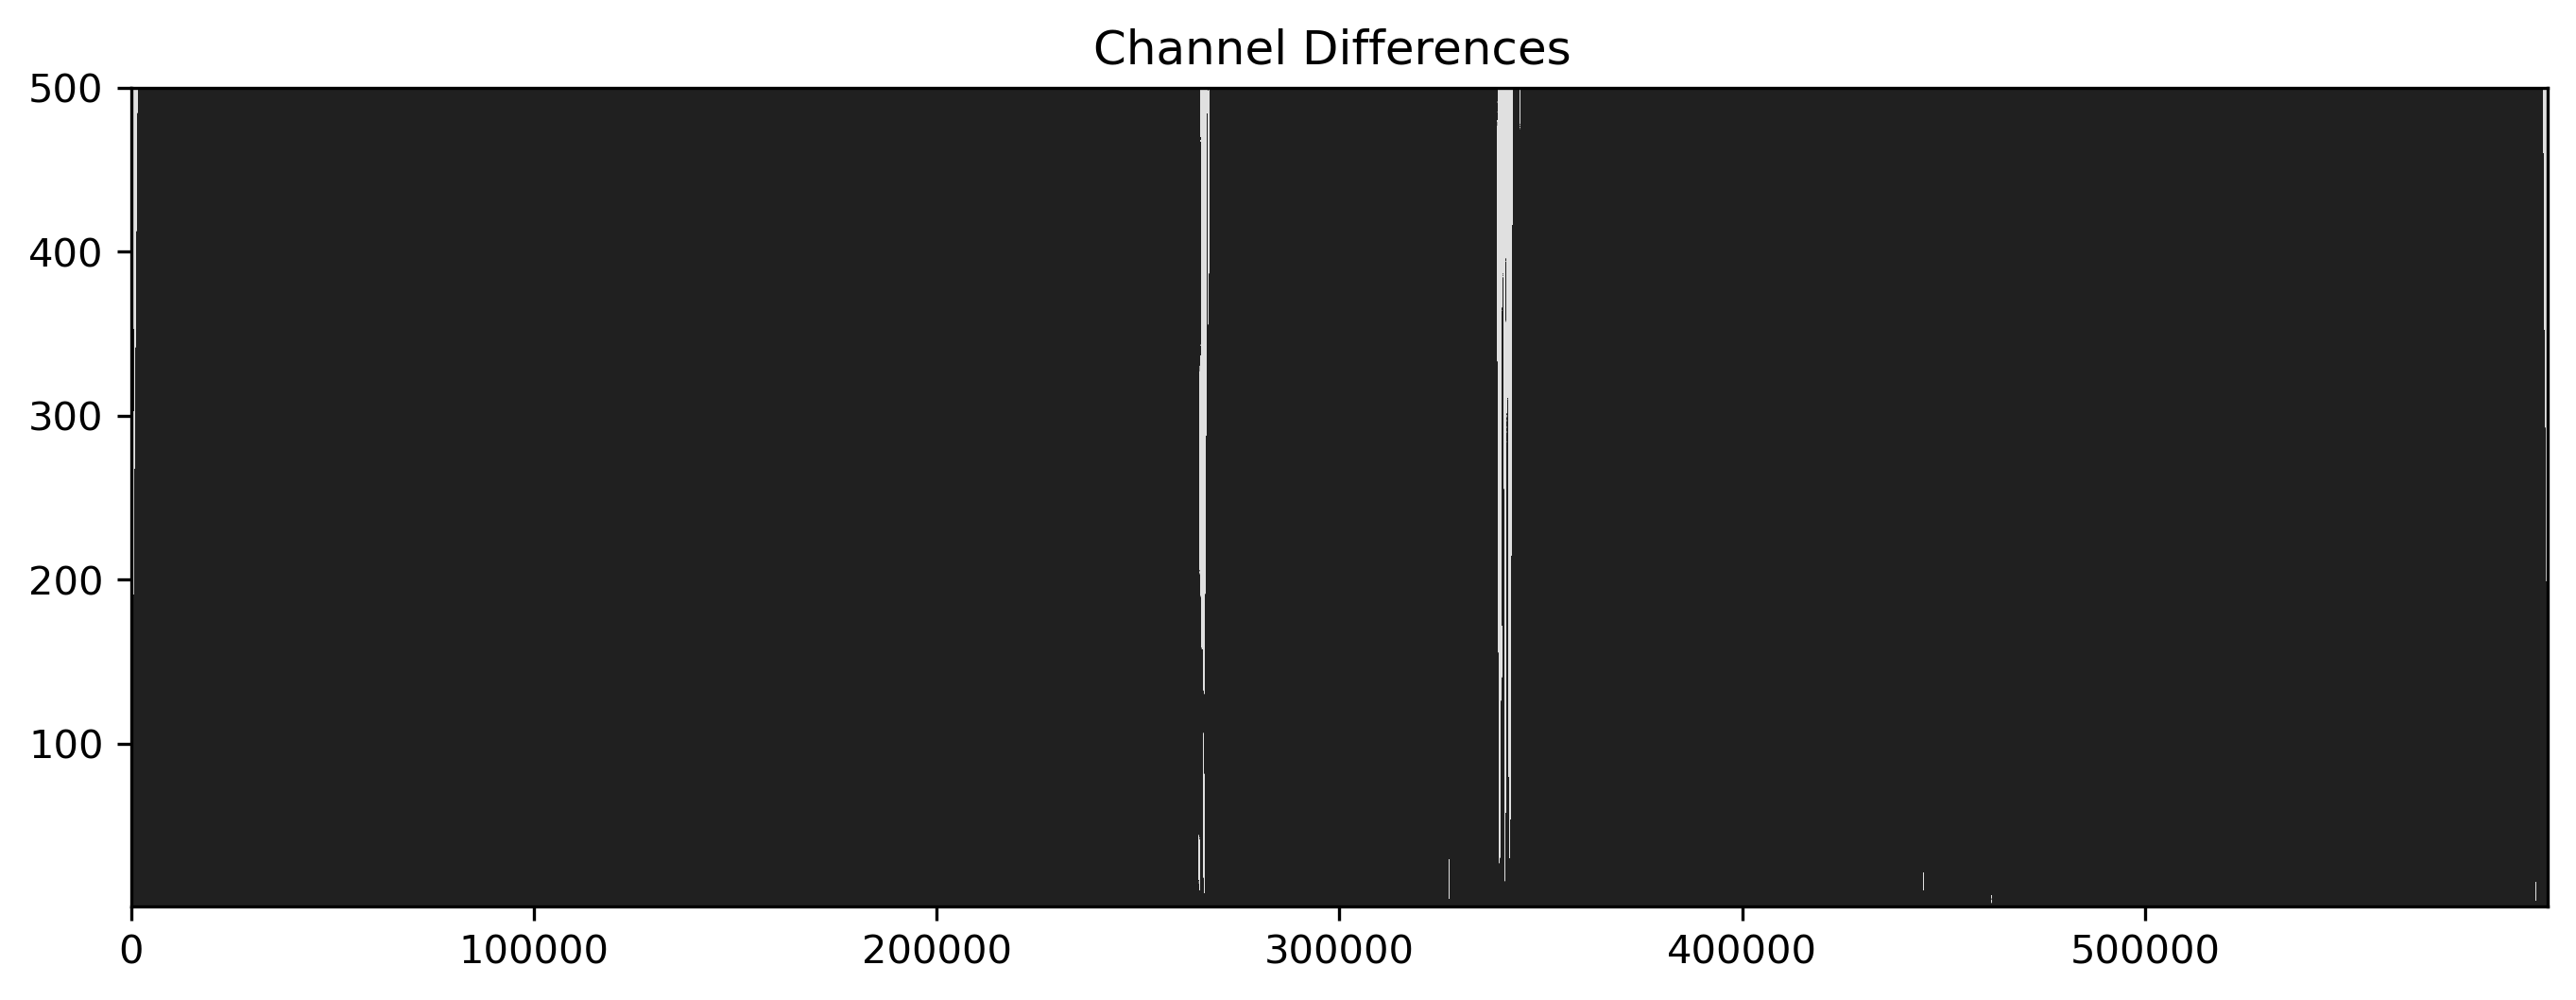

1

In [20]:
#
#     data, title = '', SaveSpot = location, ToSave = Saving, Show = True, Pdpi =PlotDPI, Titles=False
cf.PlotFingerPrint(fprint0.T, 'Channel 0 ' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
cf.PlotFingerPrint(fprint1.T, 'Channel 1 ', ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
cf.PlotFingerPrint(fprintD.T, 'Channel Differences ' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)



In [40]:
start=330000
end = 350000

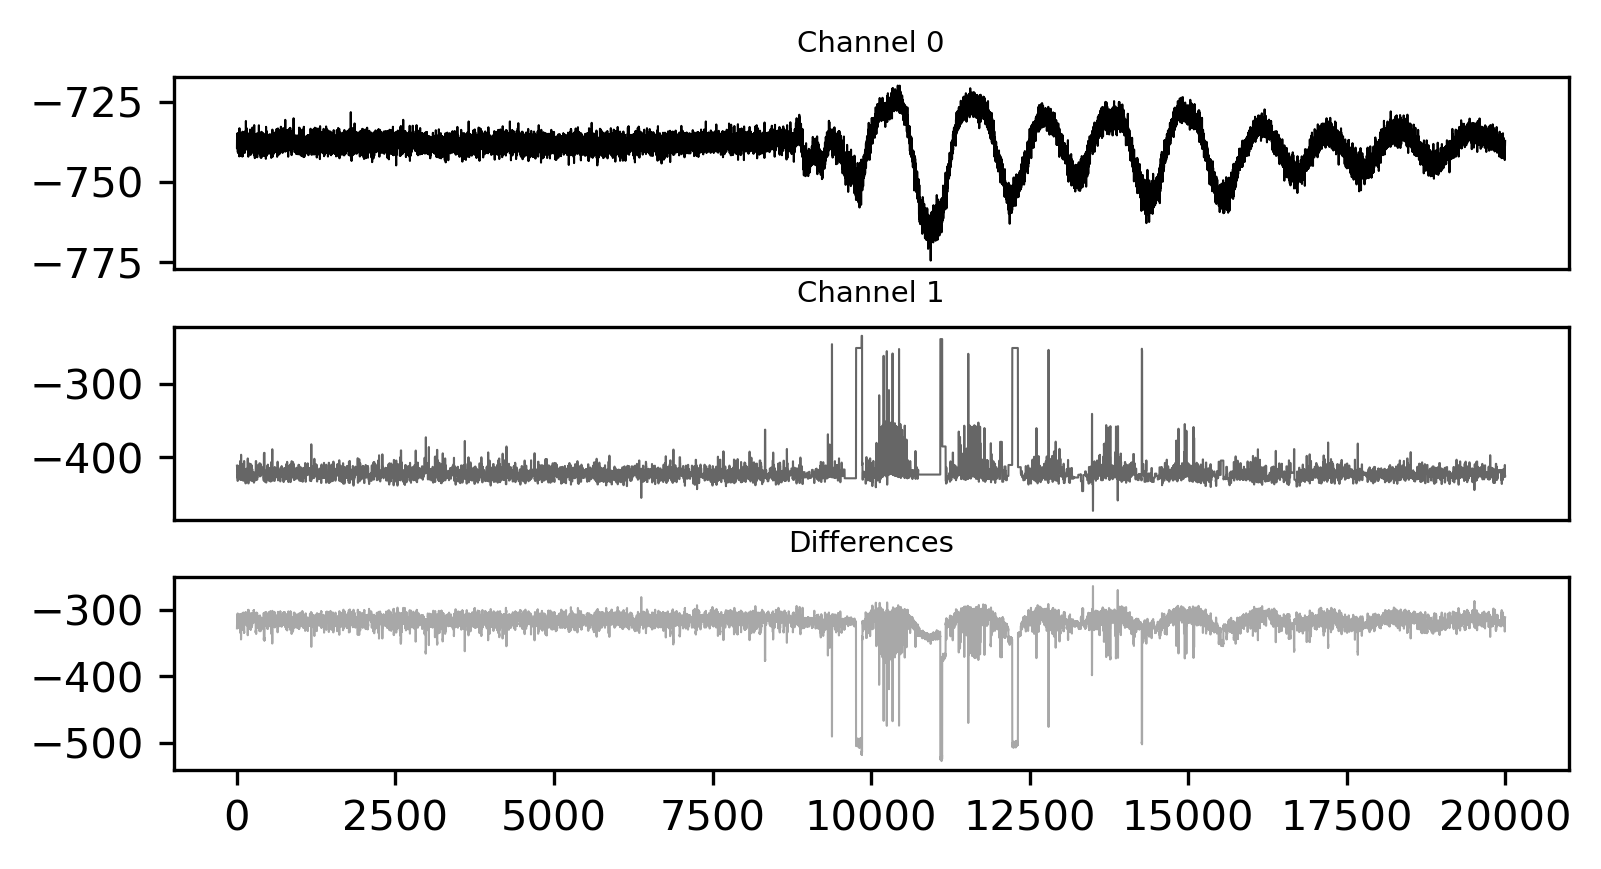

In [41]:
fig,axs = plt.subplots(3,figsize=(6,3), dpi=Fdpi)
plt.subplots_adjust(hspace=0.3)
axs[0].plot(Clean0[start:end], label='Channel 0',linewidth=0.5)
axs[0].set_title('Channel 0', fontsize=7)
axs[0].set_xticks([])
axs[1].plot(Clean1[start:end], label='Channel 1',linewidth=0.5, color='0.4')
axs[1].set_title('Channel 1', fontsize=7)
axs[1].set_xticks([])
axs[2].plot(CleanDiff[start:end], label='Differences',linewidth=0.5,color='0.66')
axs[2].set_title('Differences', fontsize=7)
plt.show()

In [42]:
wvlt

'db4'

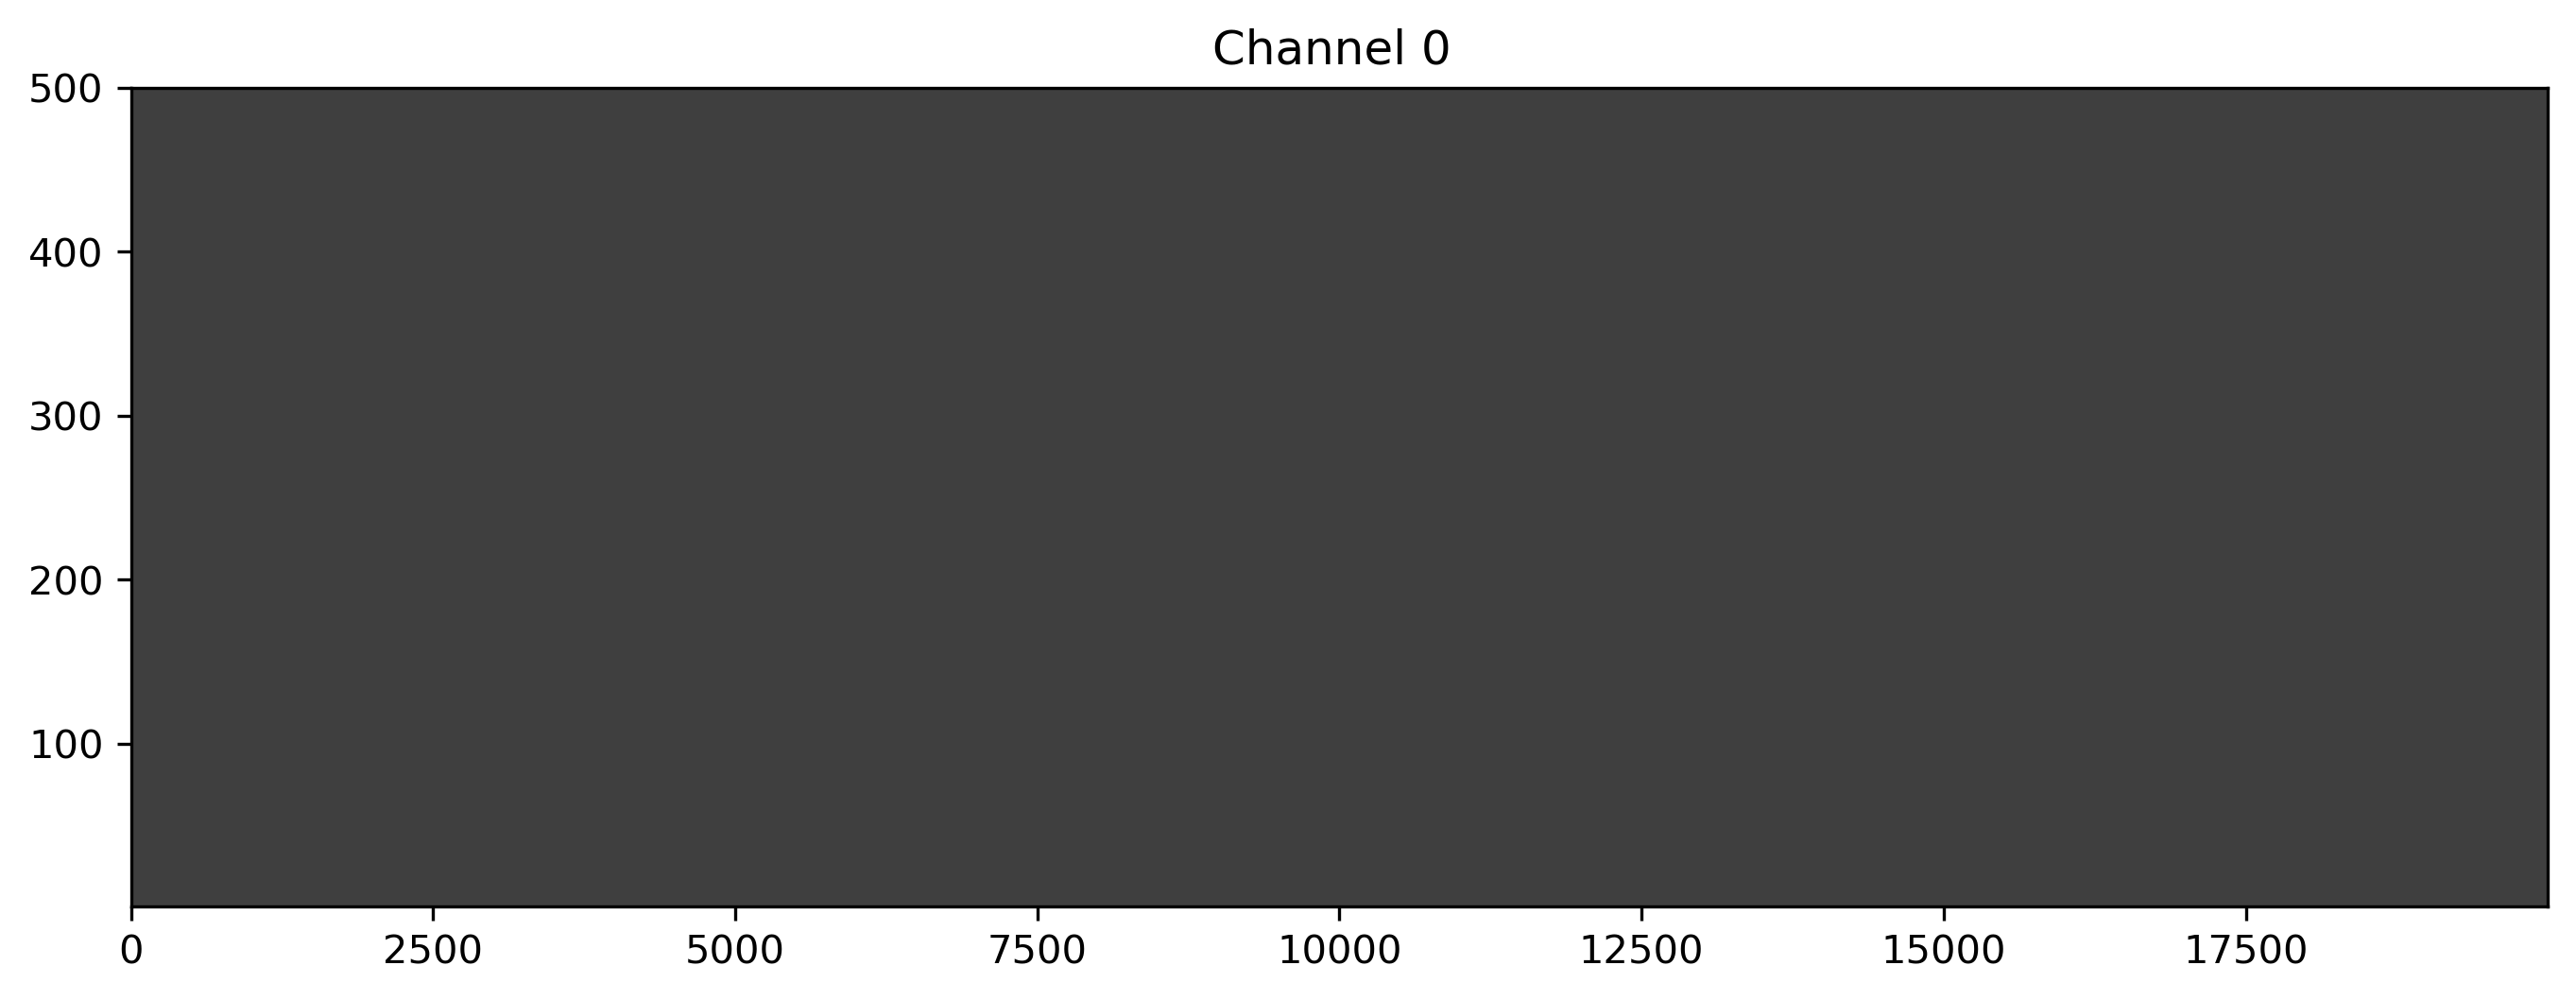

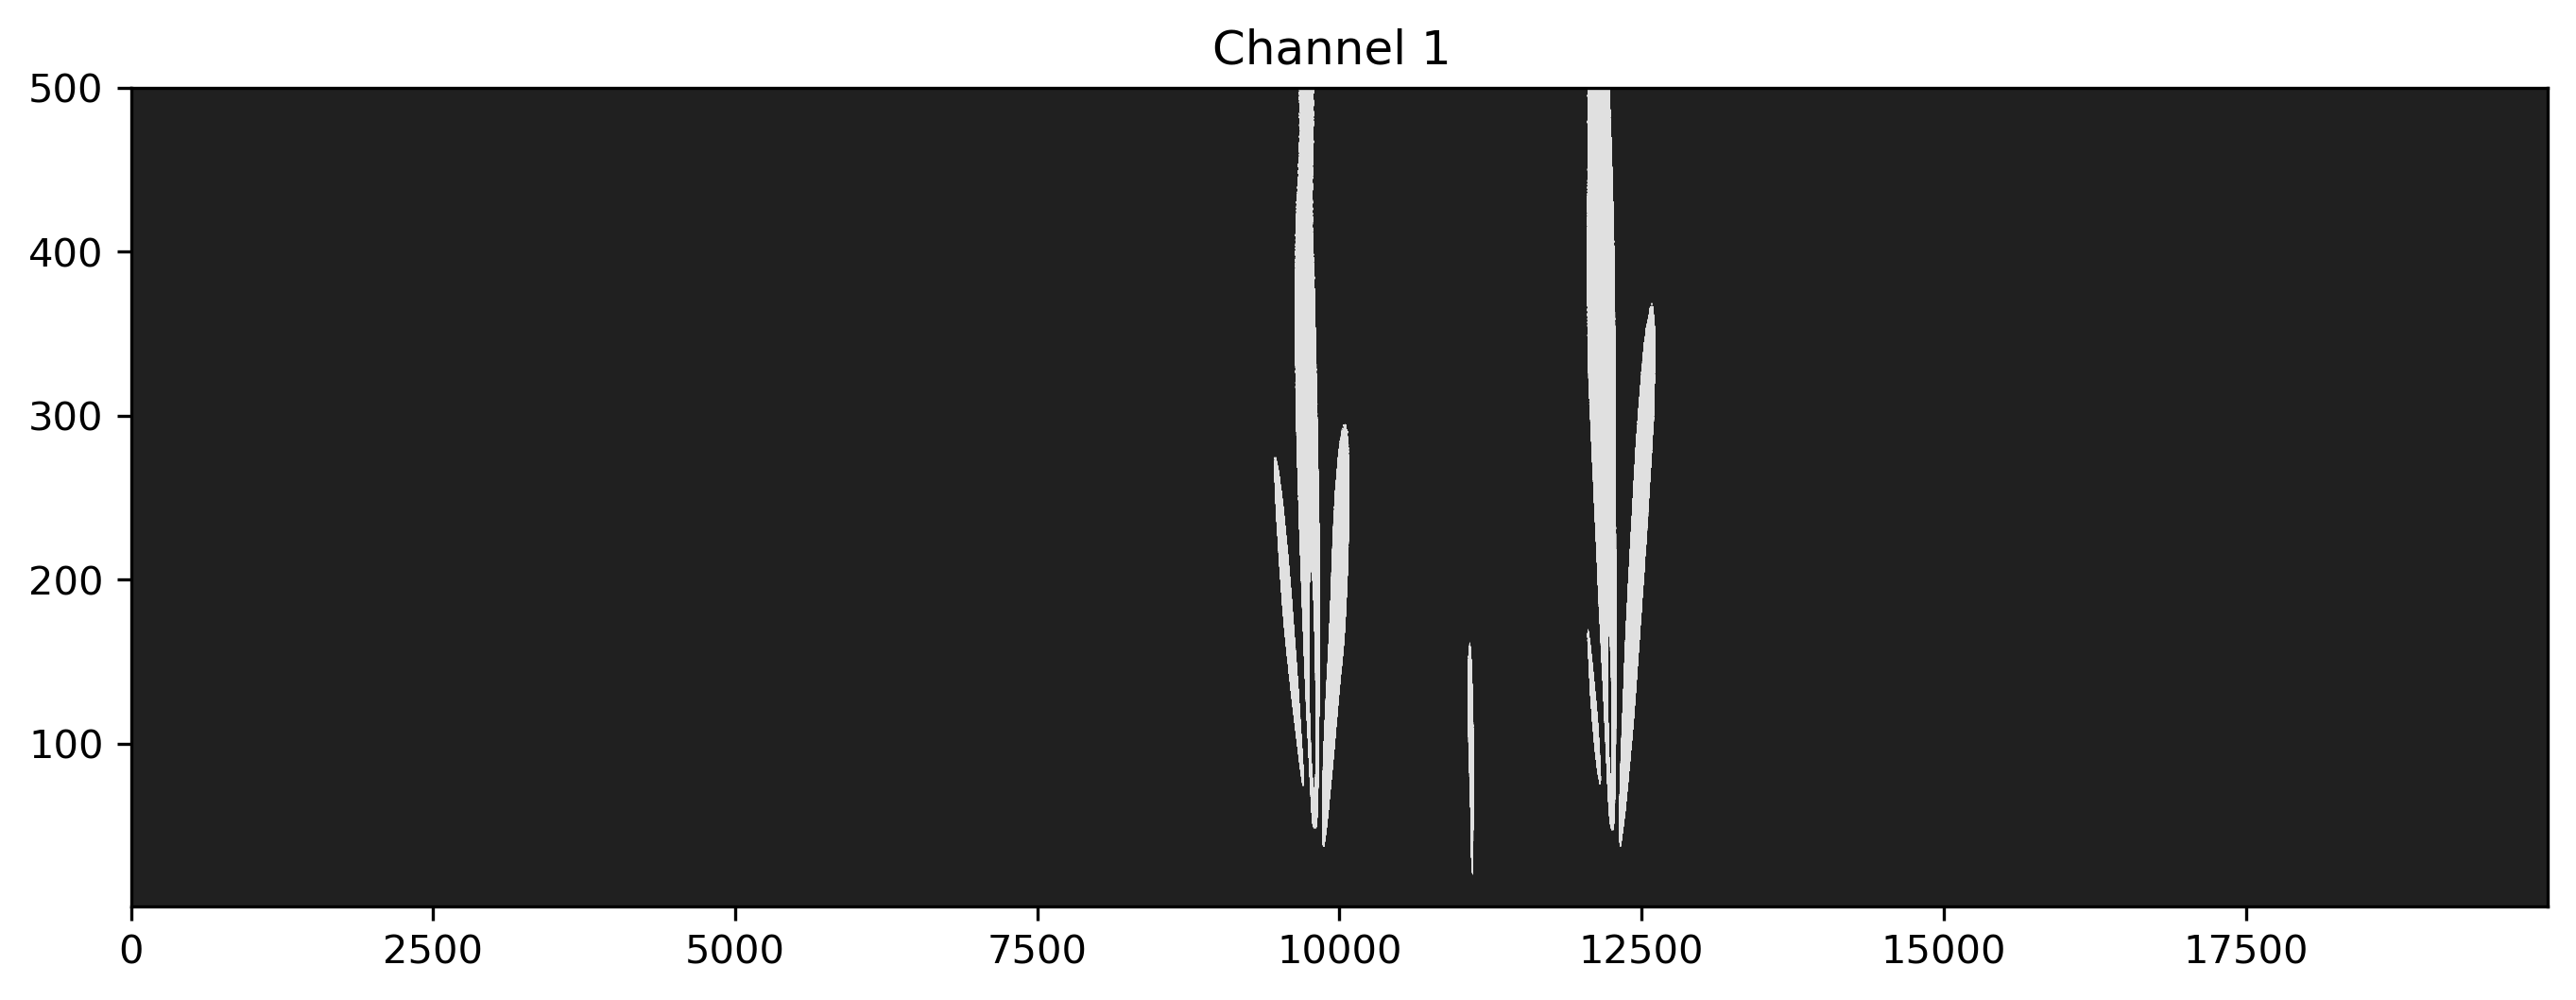

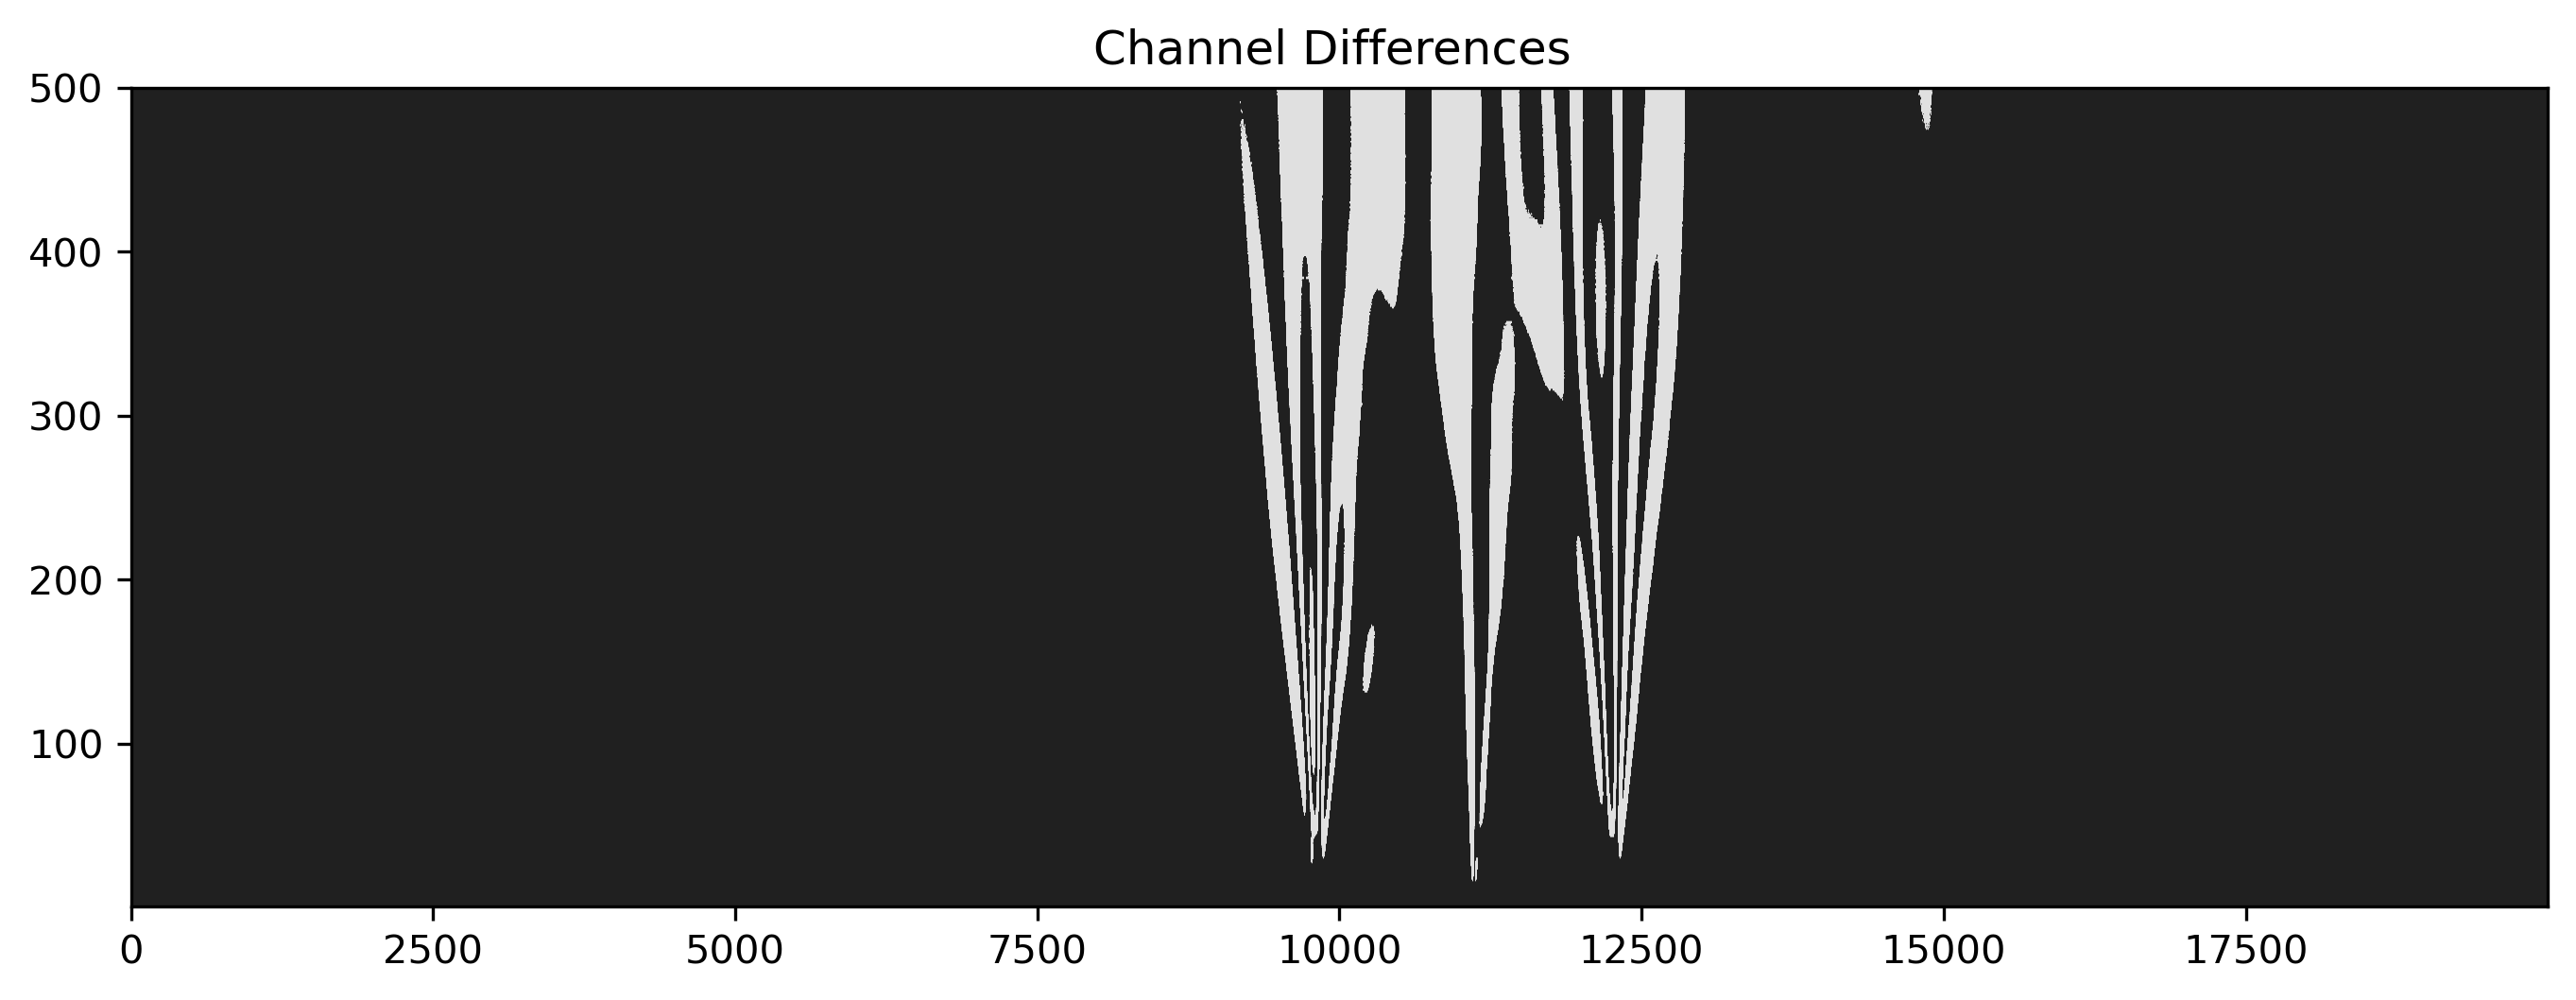

1

In [43]:
#
#     data, title = '', SaveSpot = location, ToSave = Saving, Show = True, Pdpi =PlotDPI, Titles=False
cf.PlotFingerPrint(fprint0[start:end].T, 'Channel 0 ' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
cf.PlotFingerPrint(fprint1[start:end].T, 'Channel 1 ', ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
cf.PlotFingerPrint(fprintD[start:end].T, 'Channel Differences ' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)



In [44]:
fprintDs = cf.getThumbprint2(CleanDiff[start:end], wvlt, scales,2)
fprint0s = cf.getThumbprint2(Clean0[start:end], wvlt, scales, 2)
fprint1s = cf.getThumbprint2(Clean1[start:end], wvlt, scales, 2)


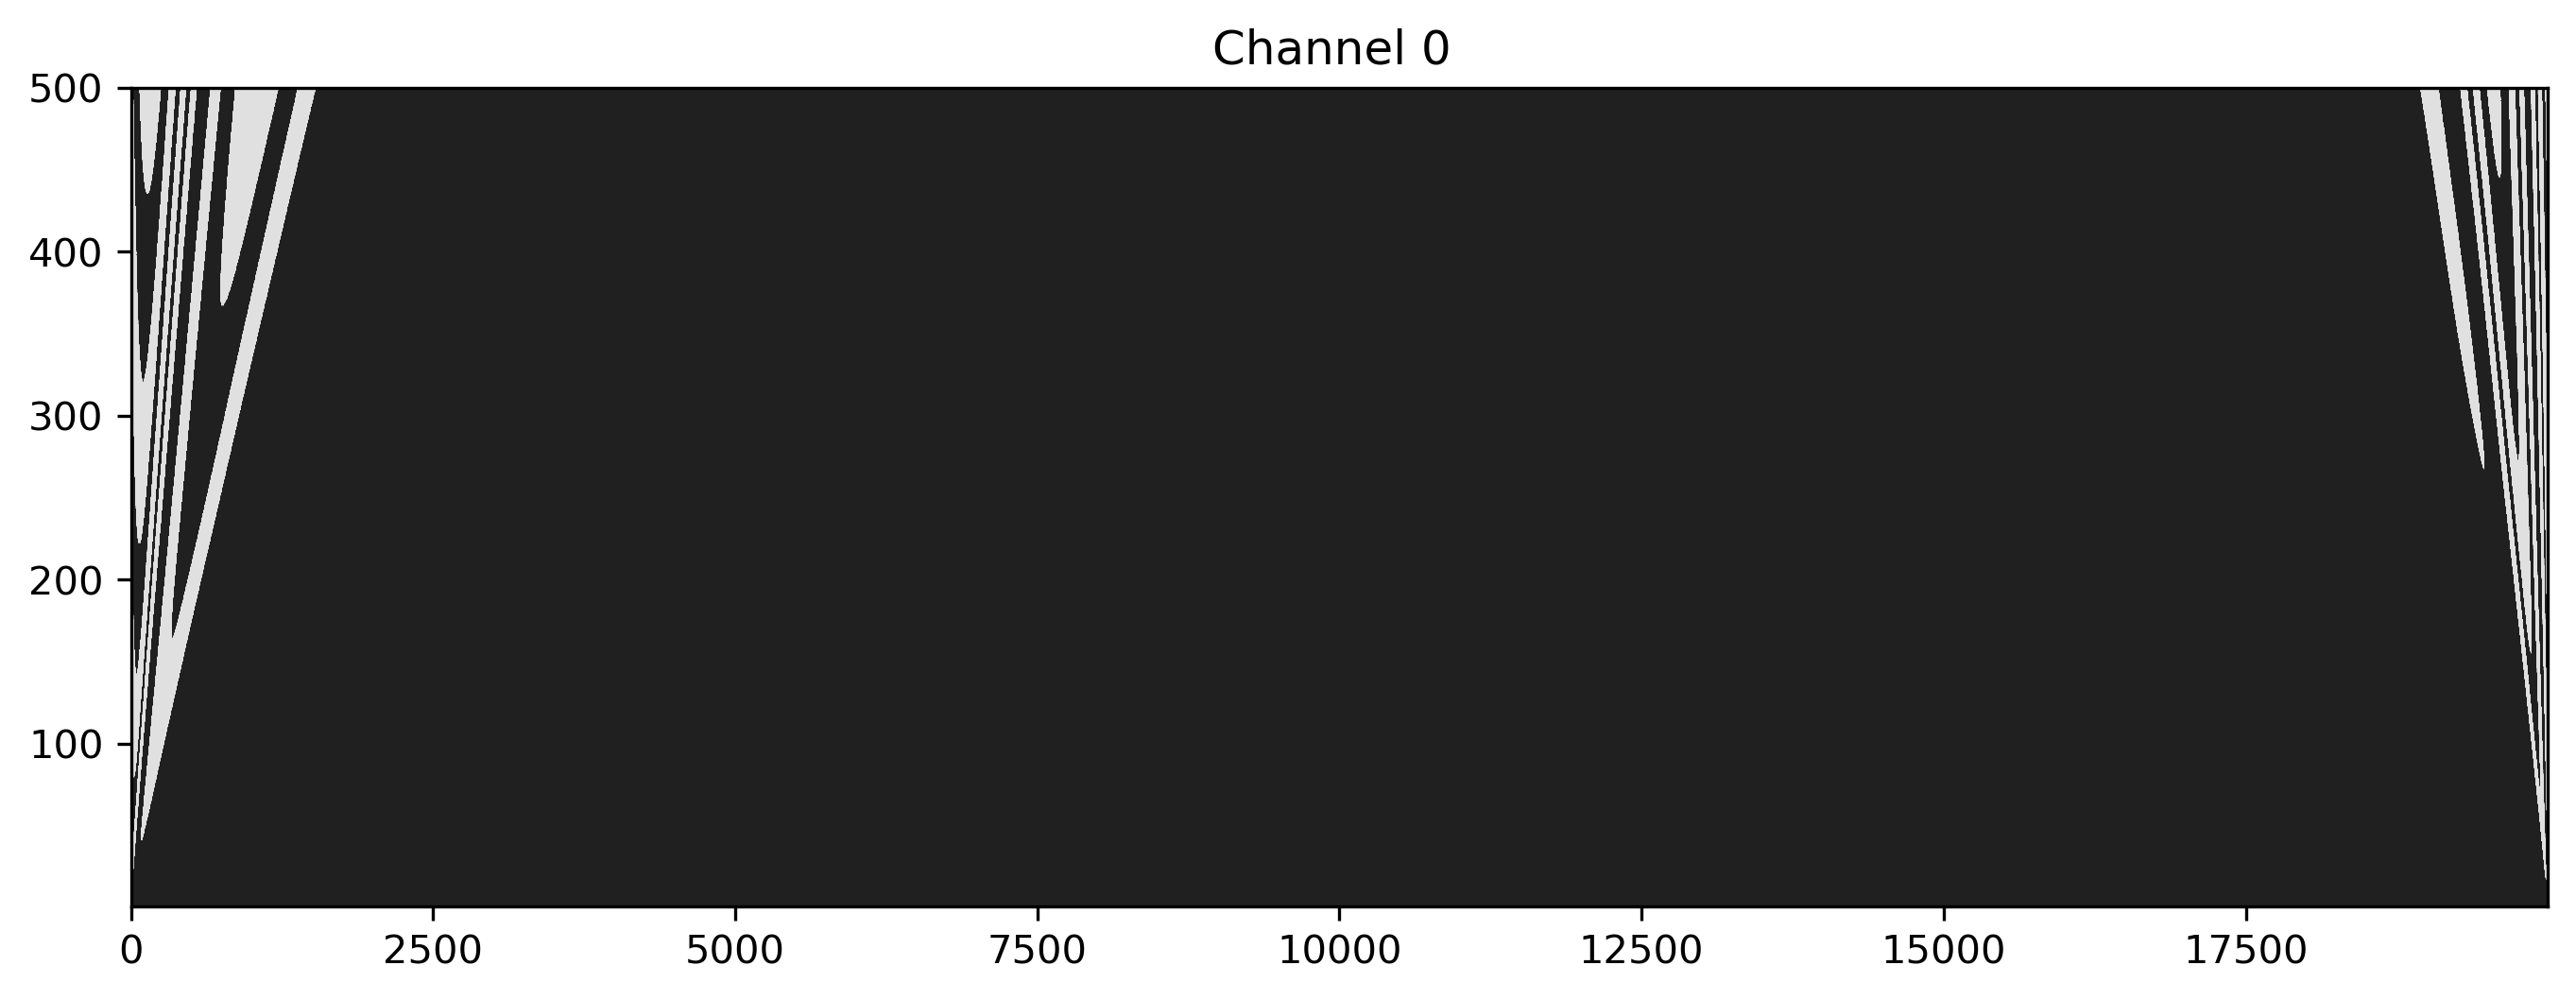

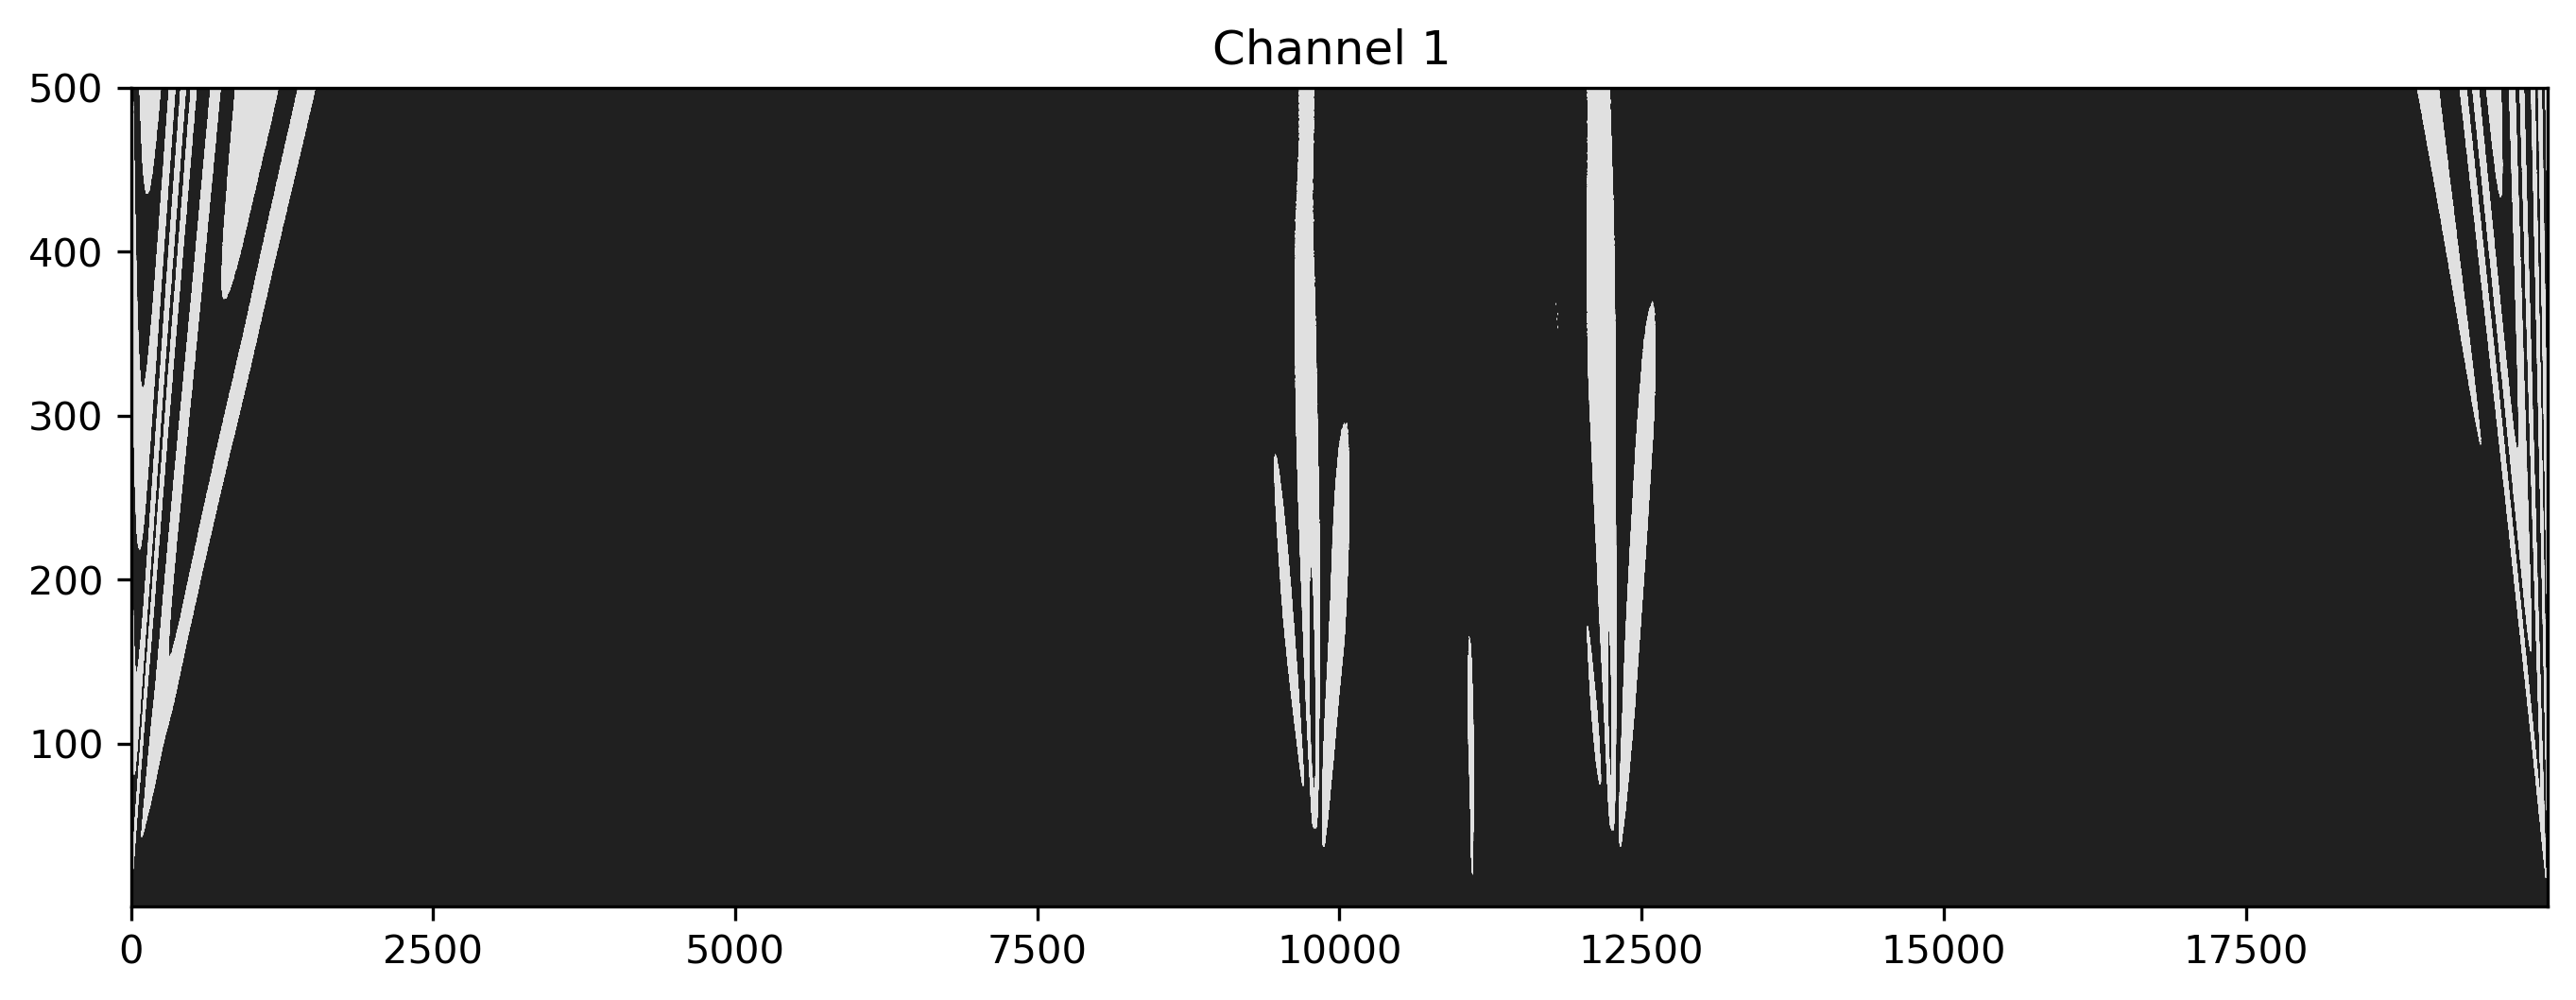

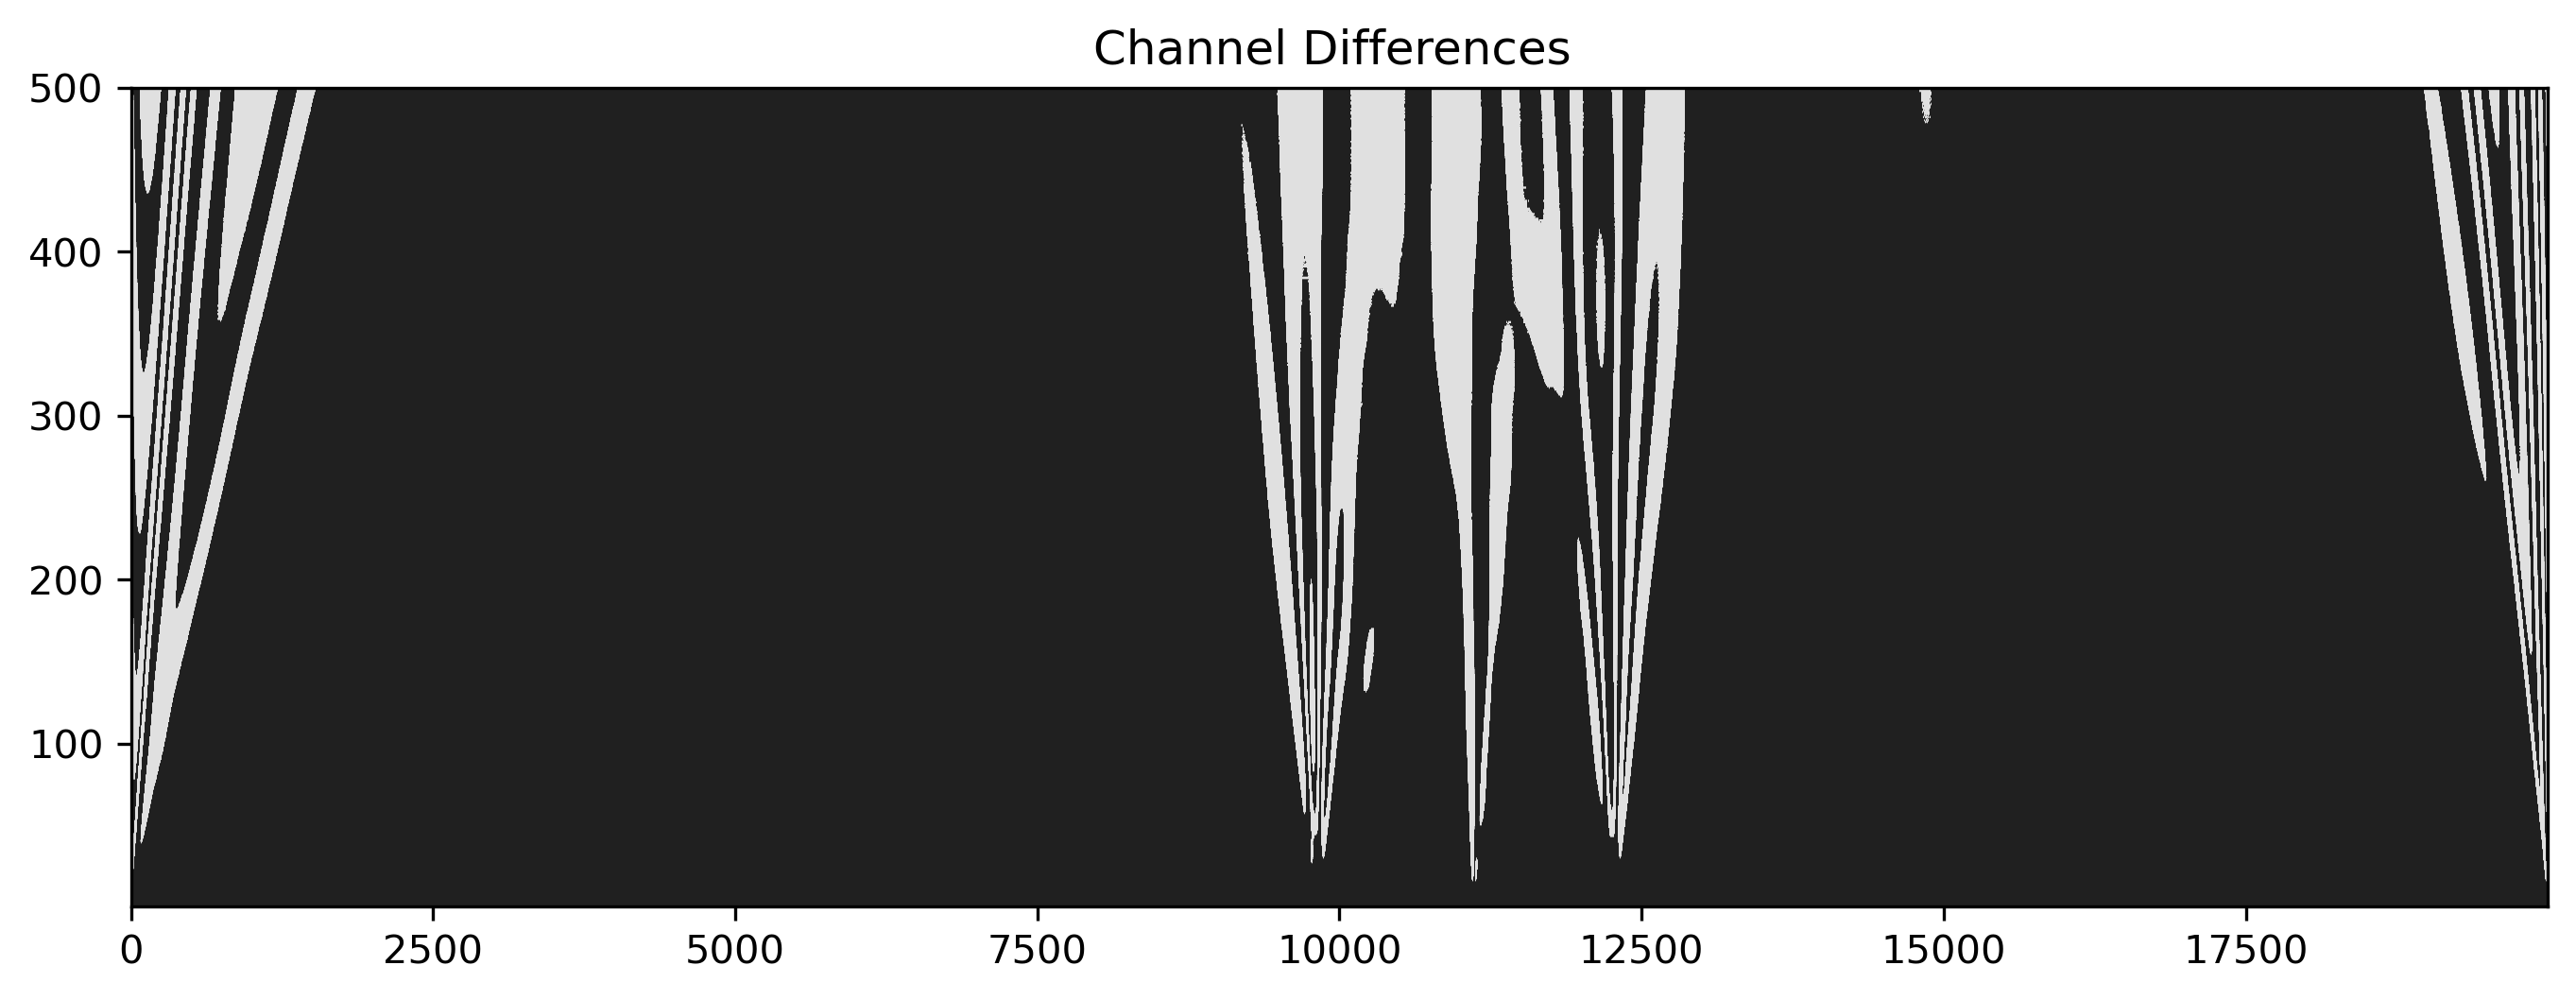

1

In [45]:
cf.PlotFingerPrint(fprint0s.T, 'Channel 0 ' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
cf.PlotFingerPrint(fprint1s.T, 'Channel 1 ', ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
cf.PlotFingerPrint(fprintDs.T, 'Channel Differences ' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)



In [46]:
fprintDss = cf.getThumbprint2(CleanDiff[start-2000:end+2000], wvlt, scales,2)
fprint0ss = cf.getThumbprint2(Clean0[start-2000:end+2000], wvlt, scales, 2)
fprint1ss = cf.getThumbprint2(Clean1[start-2000:end+2000], wvlt, scales, 2)


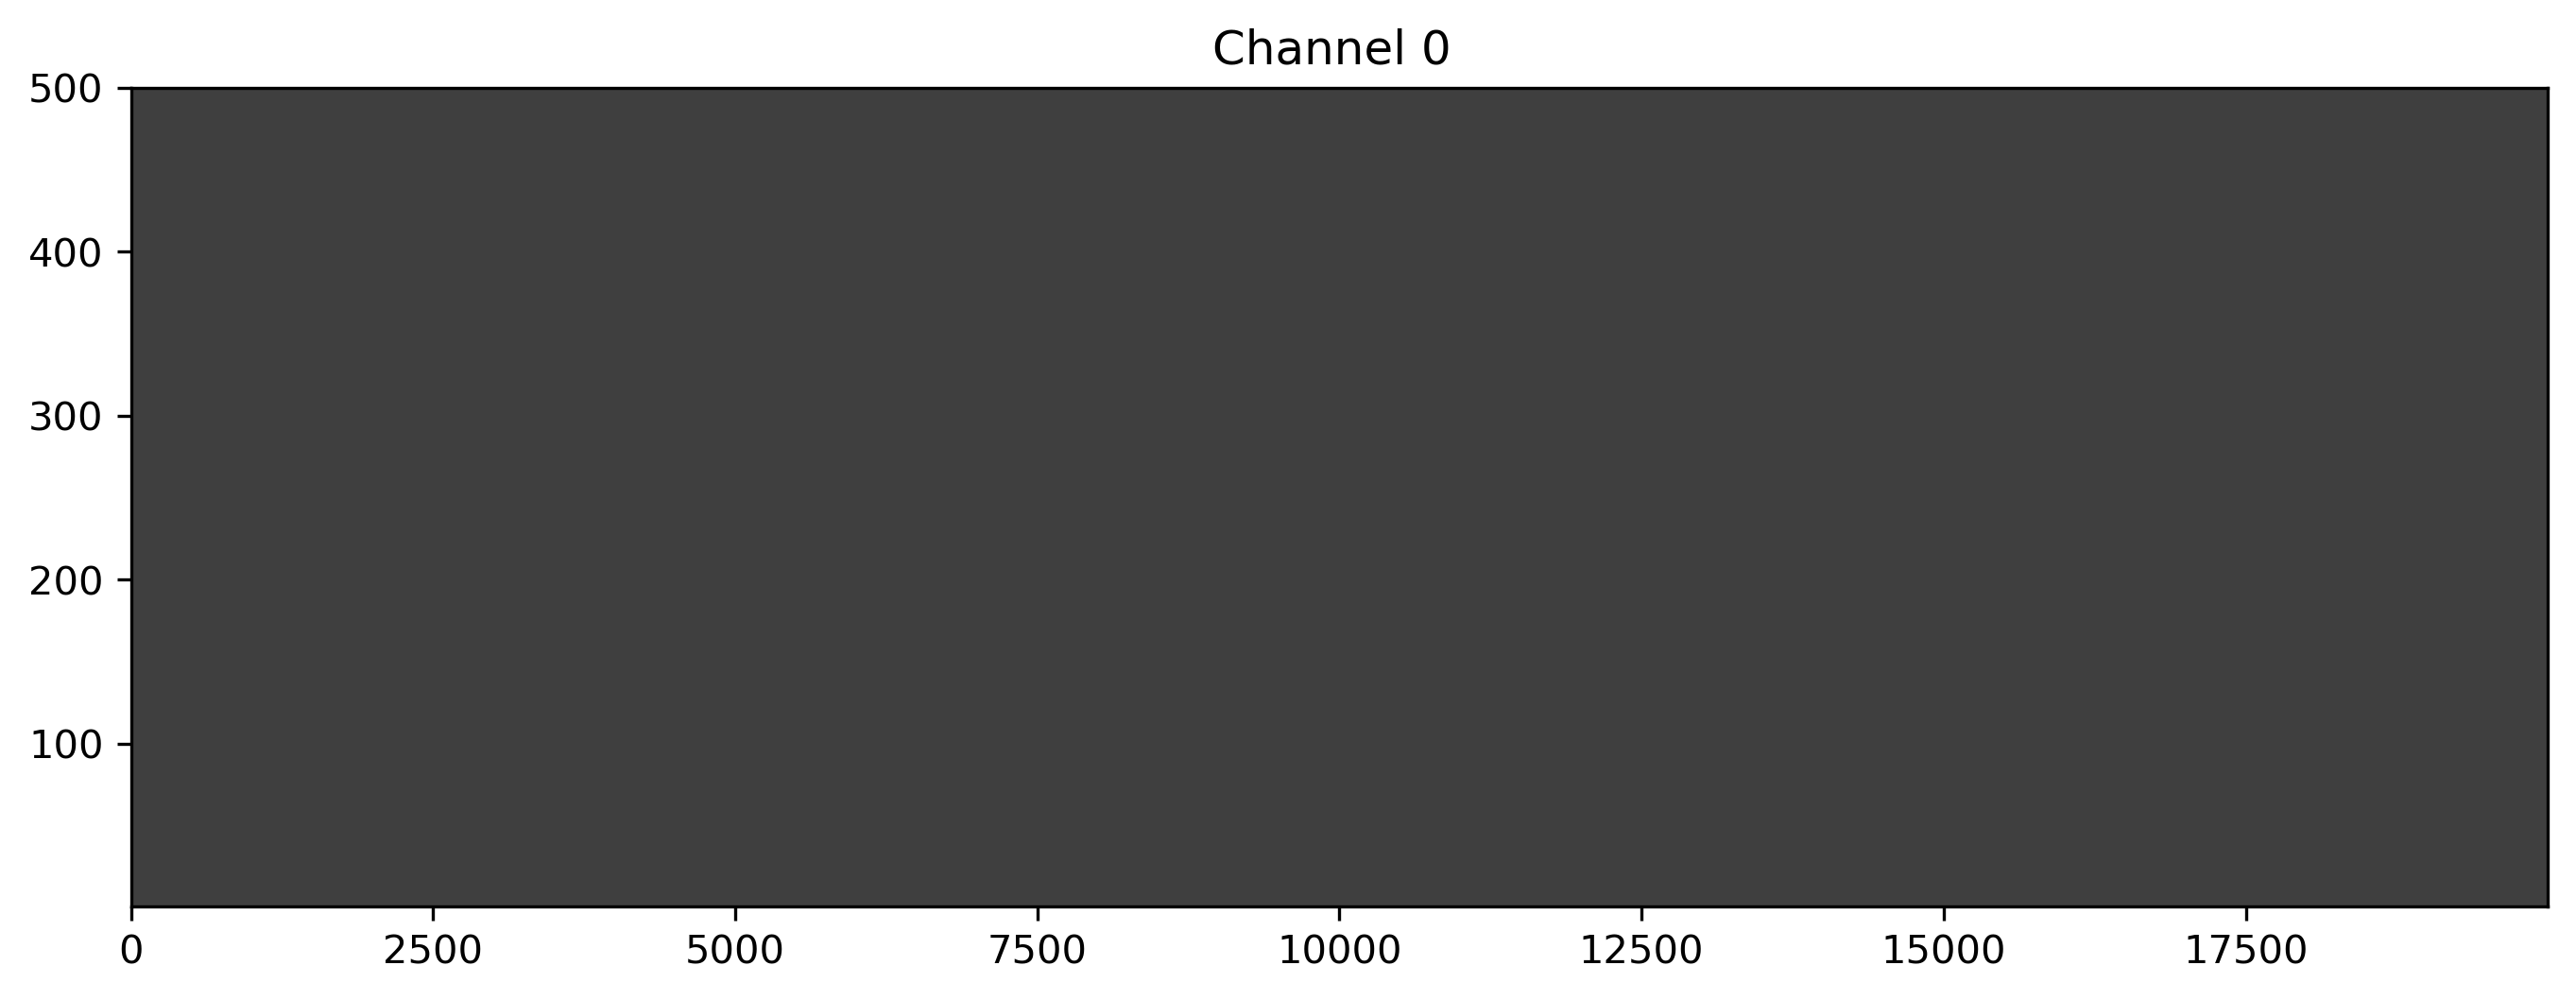

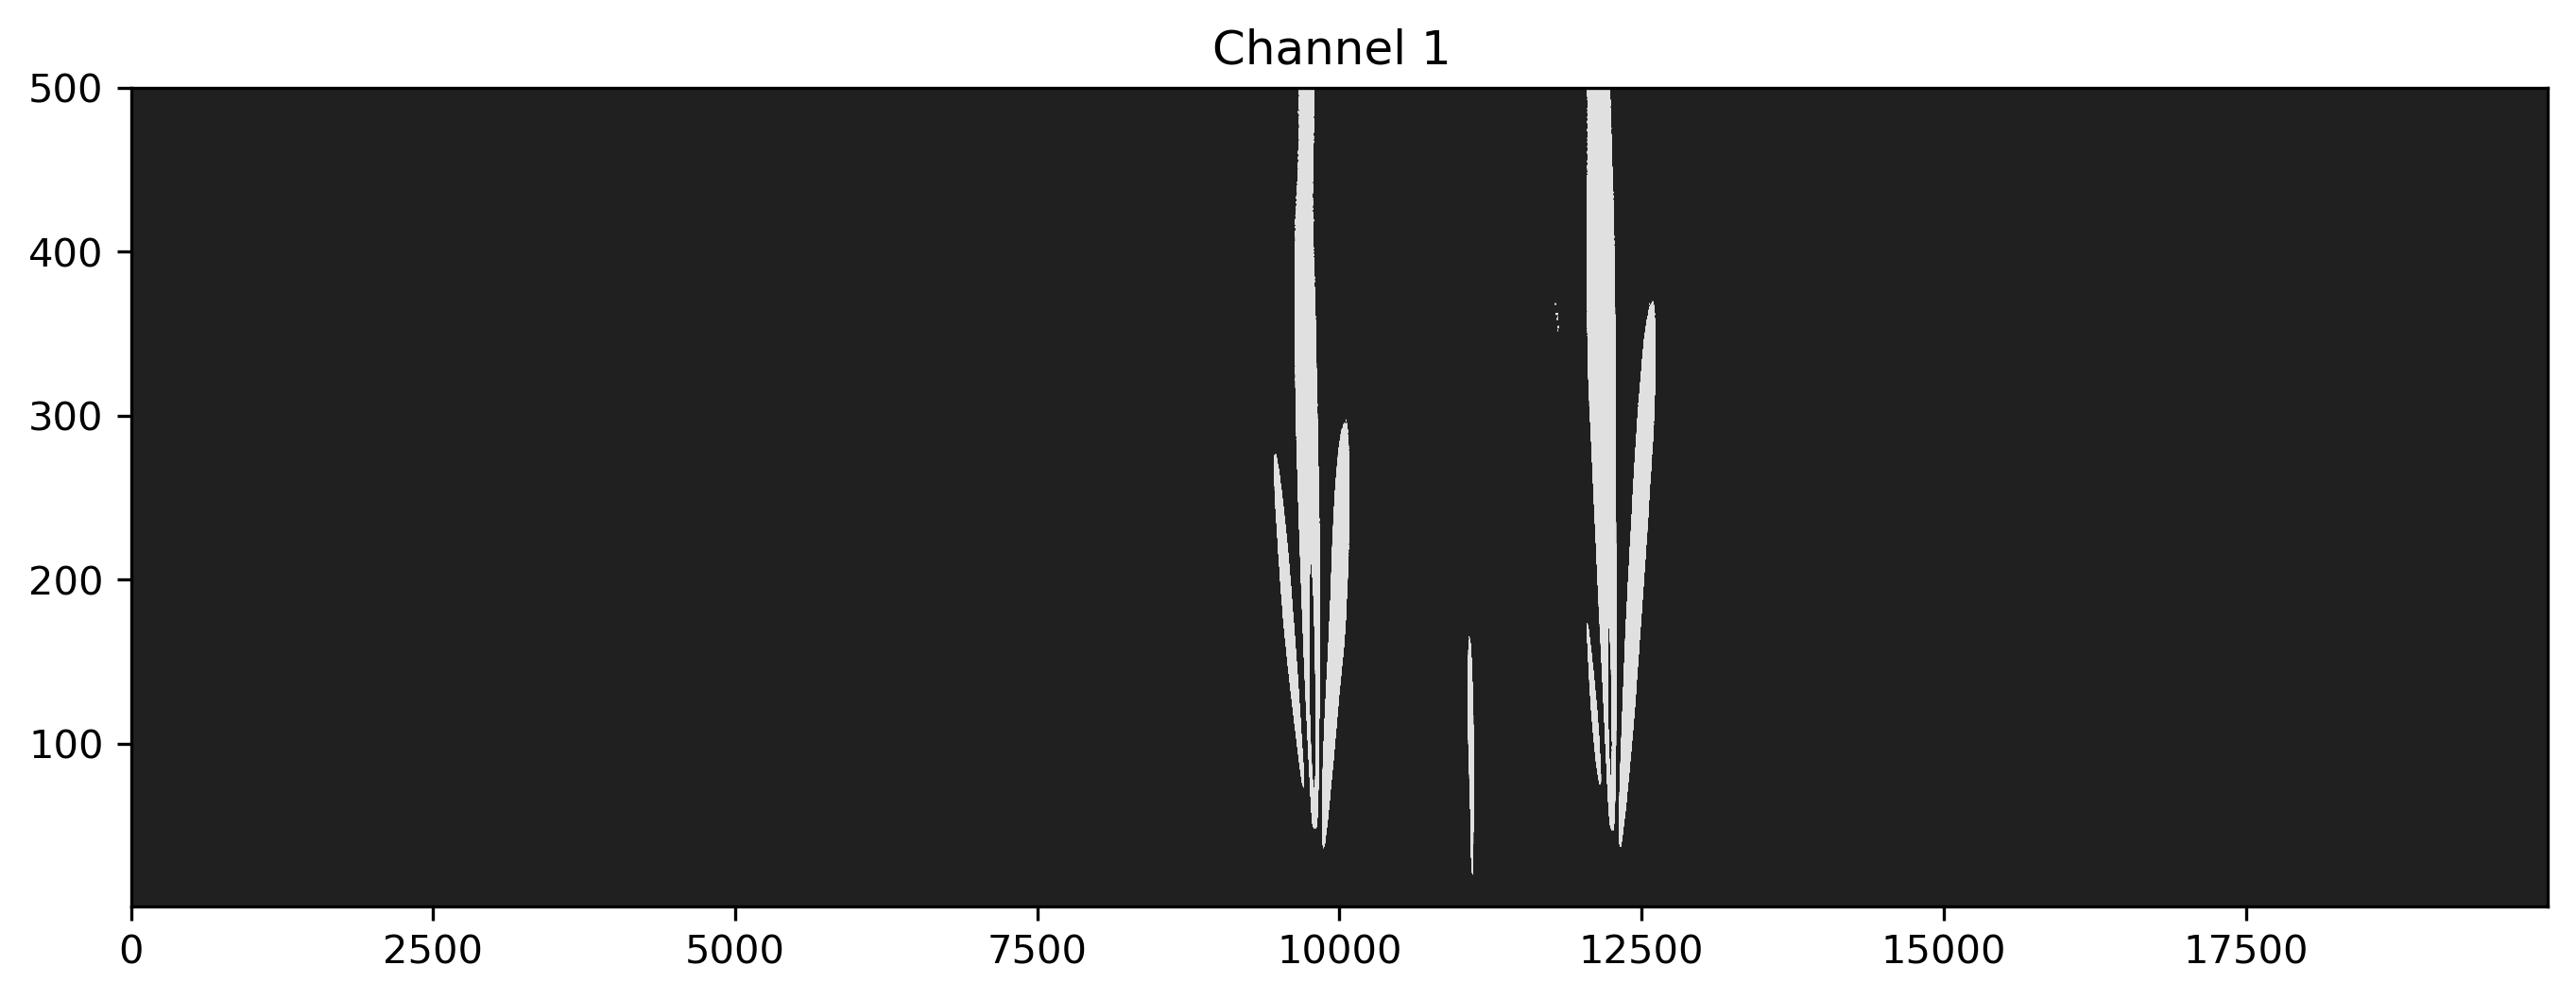

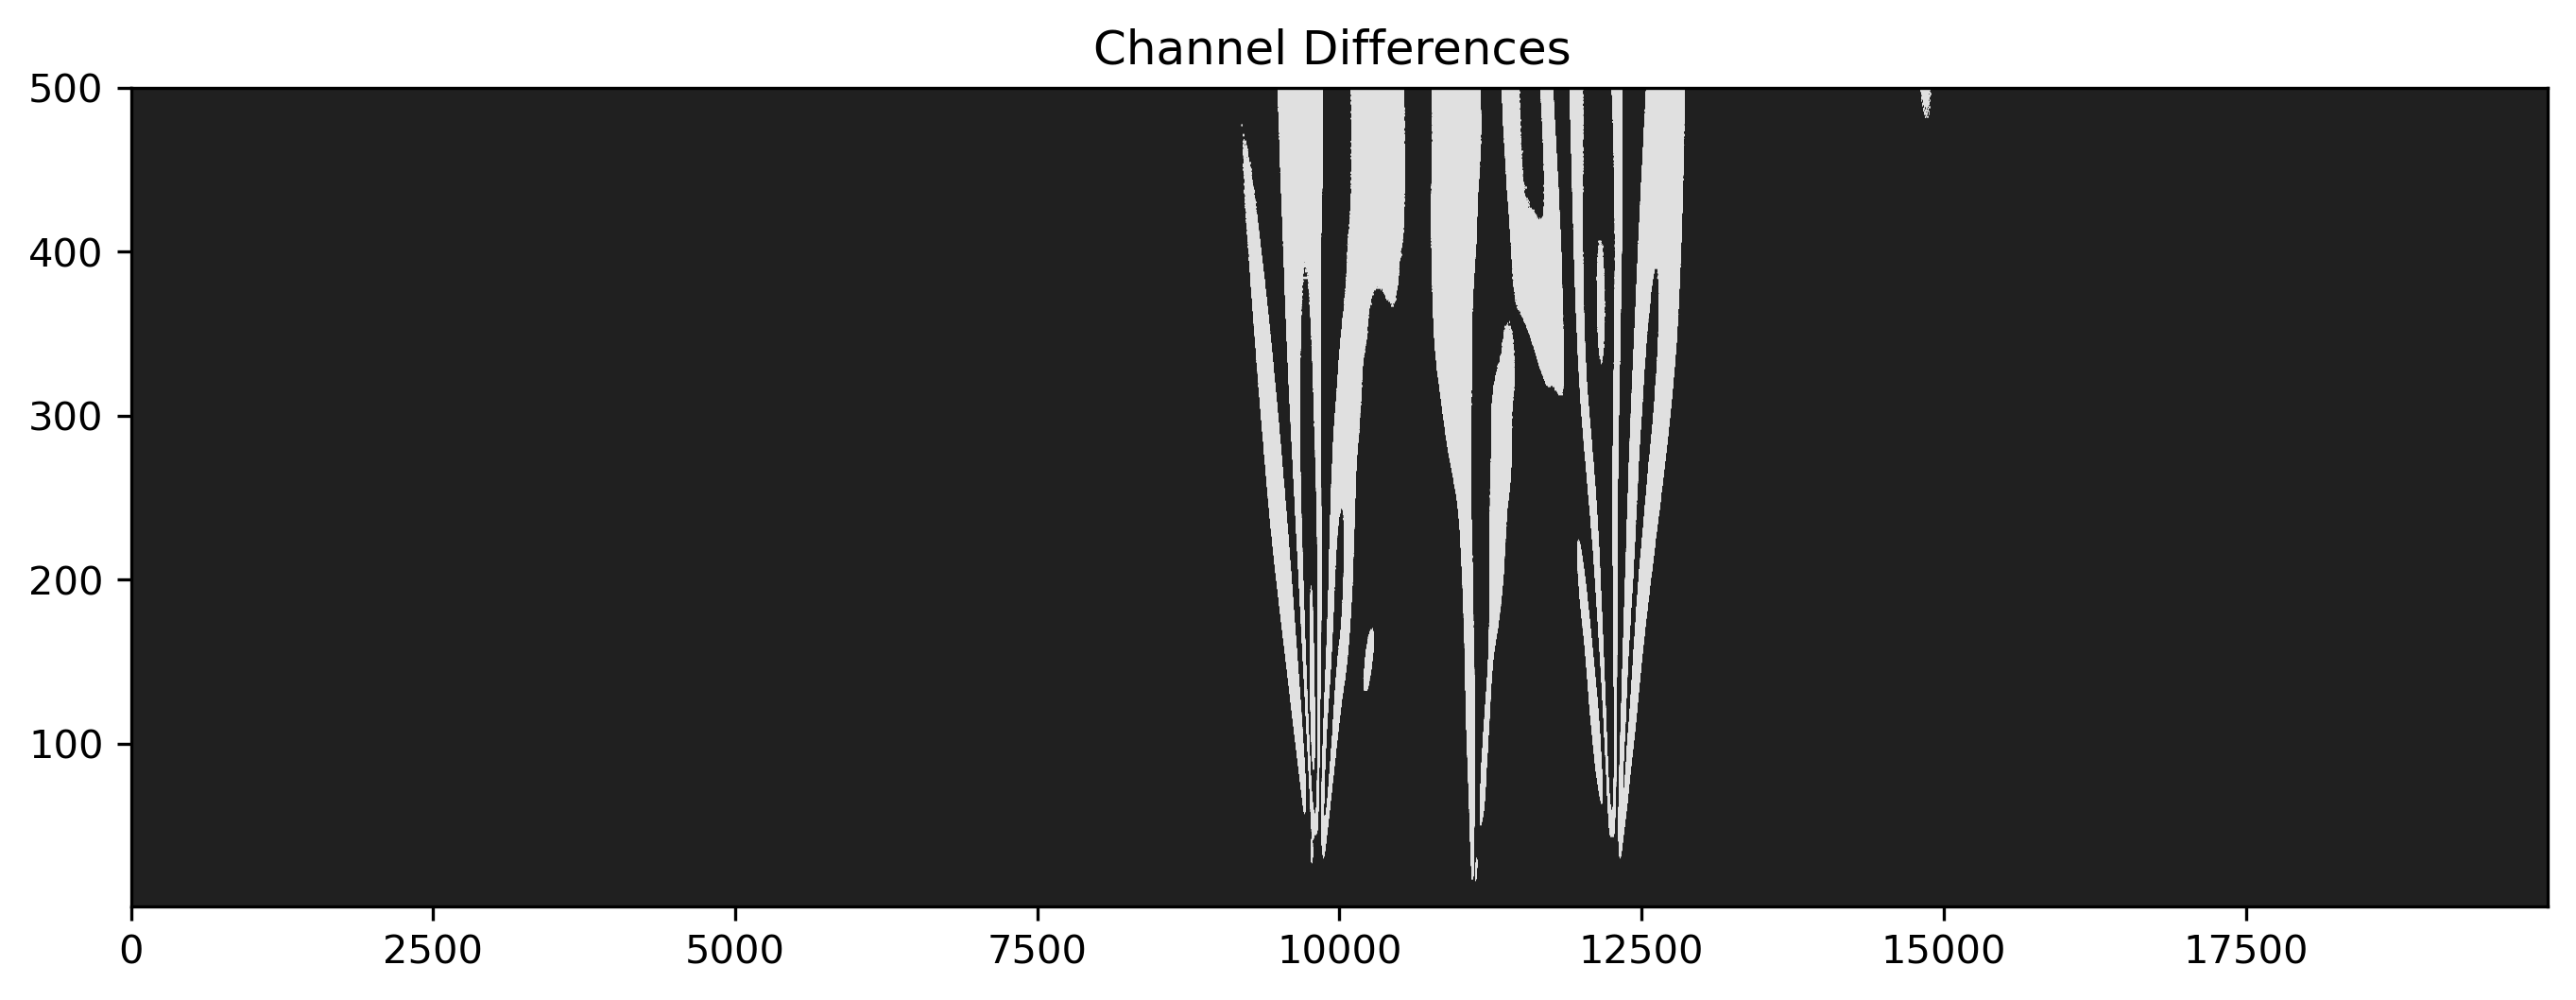

1

In [47]:
cf.PlotFingerPrint(fprint0ss[2000:-2000].T, 'Channel 0 ' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
cf.PlotFingerPrint(fprint1ss[2000:-2000].T, 'Channel 1 ', ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
cf.PlotFingerPrint(fprintDss[2000:-2000].T, 'Channel Differences ' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)


In [48]:
Ridges0 = cf.RidgeCount(fprint0ss[2000:-2000].T)
Ridges1 = cf.RidgeCount(fprint1ss[2000:-2000].T)
RidgesD = cf.RidgeCount(fprintDss[2000:-2000].T)

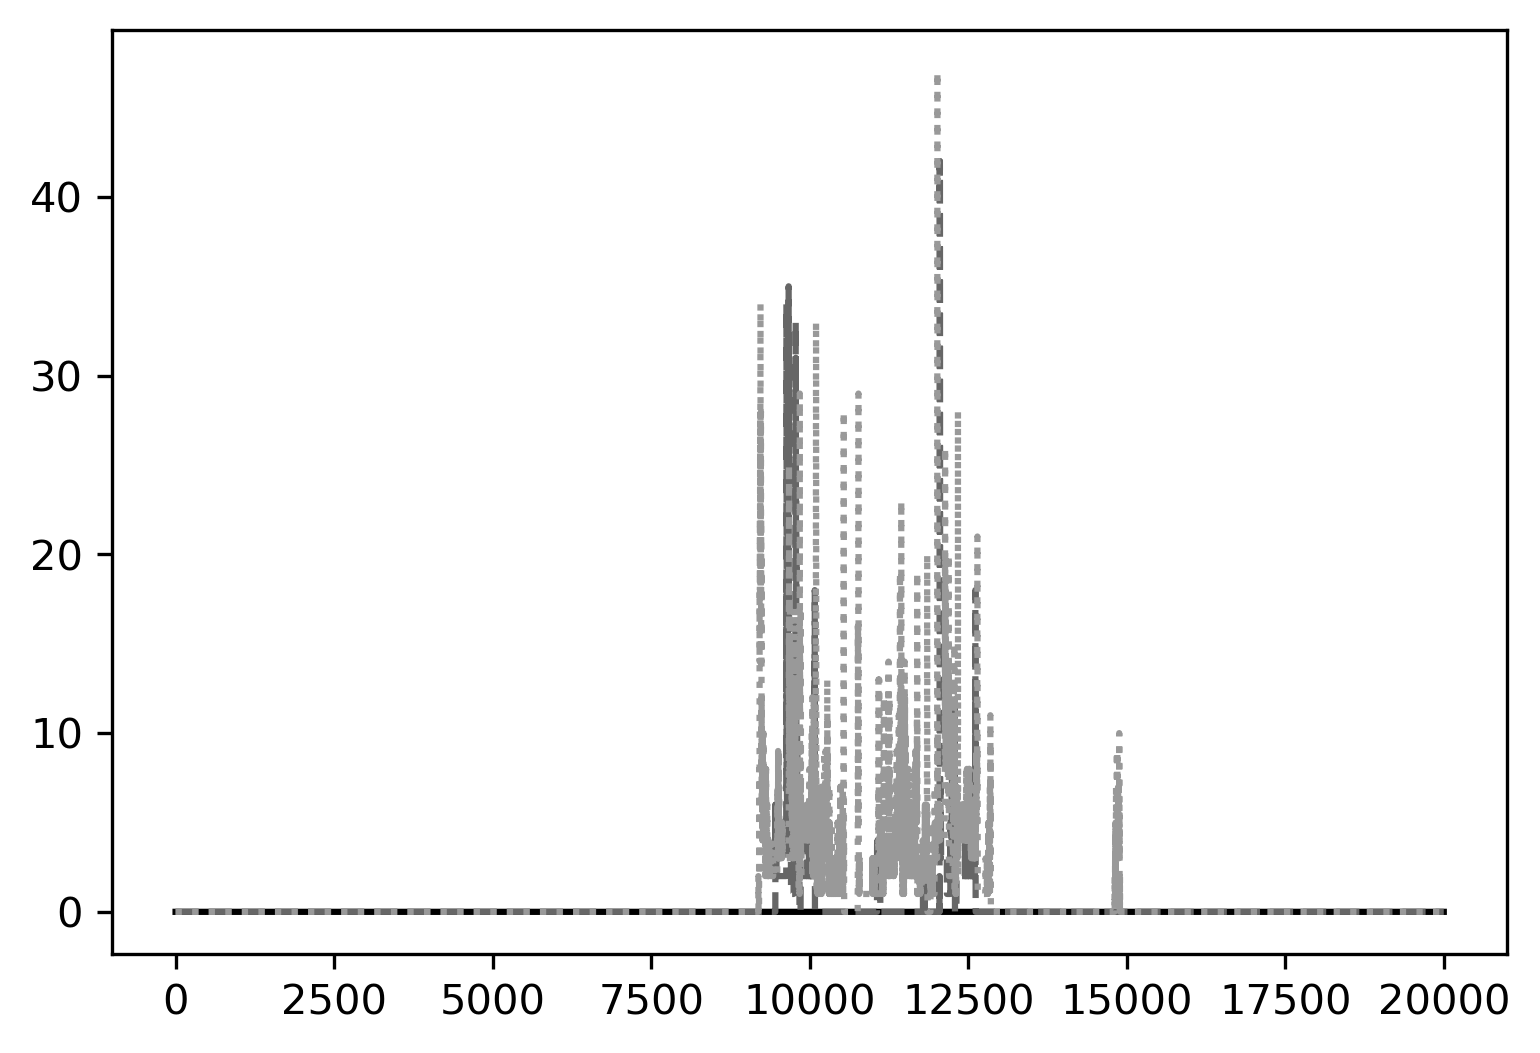

In [49]:
fig = plt.figure(figsize=(6,4), dpi=Fdpi)
plt.plot(Ridges0)
plt.plot(Ridges1)
plt.plot(RidgesD)
plt.show()

In [31]:
import DWFT as dwft

In [32]:
getThumbprint(data, wvt, ns=50, numslices=5, slicethickness=0.12, 
                  valleysorpeaks='both', normconstant=1, plot=True):

SyntaxError: invalid syntax (796784281.py, line 2)

In [ ]:
result = dwft.FPFeatureVector(fprint0ss[2000:-2000].T)

In [ ]:
Wvlts

In [ ]:
wvlt = 'mexh'
fprintD = cf.getThumbprint2(CleanDiff, wvlt, scales,2)
cf.PlotFingerPrint(fprintD[start:end].T, 'Channel Differences ' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)


In [ ]:
asdfasdf

In [ ]:
for i in range(120):
    start = i*2500
    end = start+2499
    
    fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.2)
    plt.plot(CleanDiff[start:end], label='Diffs')
    plt.plot(Clean0[start:end], label='Chan0')
    plt.plot(Clean1[start:end], label='Chan1')
    plt.title=('Source '+file)
    #plt.title()
    plt.savefig('Source'+file+str(start)+'.png')
    plt.show()
    
fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.1) 
plt.plot(CleanDiff, label='Diffs')
plt.plot(Clean0, label='Chan0')
plt.plot(Clean1, label='Chan1')
plt.title=('Source '+file)
#plt.savefig('SourceAll'+file+'.png')
plt.show()


In [ ]:
def MakeWvltImages(wvlt):
    try:
        for i in range(12):
            start = i*25000
            end = start+24999

            fprint = cf.getThumbprint2(CleanDiff[start:end], wvlt, 1000,10)
            cf.PlotFingerPrint(fprint.T, 'Channel Differences ' + wvlt + file + ' at ' + str(start), location, True, Show=False)

            fprint = cf.getThumbprint2(Clean0[start:end], wvlt, 1000, 10)
            cf.PlotFingerPrint(fprint.T, 'Channel 0 ' + wvlt + file + ' at ' + str(start), location, True, Show=False)

            fprint = cf.getThumbprint2(Clean1[start:end], wvlt, 1000, 10)
            cf.PlotFingerPrint(fprint.T, 'Channel 1 ' + wvlt + file + ' at ' + str(start), location, True, Show=False)

    except:
        print(wvlt)
    
    return 0

In [ ]:
nothiing = Parallel(n_jobs=30)(delayed(MakeWvltImages)(wvlt) for wvlt in Wvlts)

In [ ]:
for wvlt in Wvlts:
    MakeWvltImages(wvlt)
    print(wvlt)

In [ ]:
ODataSet = np.genfromtxt(open(folder+'/'+files[2],'r'), delimiter=',',skip_header=1)
#ODataSet = ODataSet[150000:200000,:]
length = np.shape(ODataSet)[0]

#Header = ODataSet[0,:]


#SmoothRDataSet = np.zeros(np.shape(ODataSet)[0])
SmoothXDataSet = np.zeros((np.shape(ODataSet)[0],18))
#TdDataSet = np.zeros(np.shape(ODataSet)[0])

results =[]
Results = []
#fig=plt.figure(figsize=(6.67,3.75), dpi=1200)

In [ ]:
ODataSet = ODataSet[:,2:4]

In [ ]:
for coord in range(2):
    for j in range(np.shape(ODataSet)[0]-1):
        try:
            ODataSet[j,coord] = float(ODataSet[j,coord])
        except:
            ODataSet[j,coord] = ODataSet[j-1,coord]
        if ODataSet[j,coord] == -999.999:
            ODataSet[j,coord] = ODataSet[j-1,coord]

Diffs = np.zeros(np.shape(ODataSet)[0])
for j in range(np.shape(ODataSet)[0]-1):
    Diffs[j] = ODataSet[j,0] - ODataSet[j,1]
norm = np.average(ODataSet[:,0])
ODataSet[:,0]-=norm
norm = np.average(ODataSet[:,1])
ODataSet[:,1]-=norm
norm = np.average(Diffs)
Diffs[:]-=norm

In [ ]:
fig = plt.figure(figsize=(16,3))
plt.plot(ODataSet[:,0])
plt.plot(ODataSet[:,1])
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,3))
plt.plot(Diffs[:-1])
plt.show()

In [ ]:
fprint = cf.getThumbprint2(Diffs, 'mexh', 500,5)

In [ ]:
cf.PlotFingerPrint(fprint.T, 'Try 1', location, False)

In [ ]:
CleanDiff = cf.Smoothing(Diffs,2)
fprint = cf.getThumbprint2(CleanDiff, 'mexh', 500,5)
cf.PlotFingerPrint(fprint.T, 'Clean', location, False)

In [ ]:
fprint = cf.getThumbprint2(ODataSet[:,1], 'mexh', 500,5)
cf.PlotFingerPrint(fprint.T, 'Original1', location, False)

In [ ]:
CleanD = cf.Smoothing(ODataSet[:,1],2)
fprint = cf.getThumbprint2(CleanD, 'mexh', 500,5)
cf.PlotFingerPrint(fprint.T, 'Clean1', location, False)

In [ ]:
fprint = cf.getThumbprint2(ODataSet[:,0], 'mexh', 500,5)
cf.PlotFingerPrint(fprint.T, 'Original0', location, False)

In [ ]:
CleanD = cf.Smoothing(ODataSet[:,0],2)
fprint = cf.getThumbprint2(CleanD, 'mexh', 500,5)
cf.PlotFingerPrint(fprint.T, 'Clean0', location, False)

In [ ]:
#for i in range(int(length/size)):
for i in range(2):
    fig=plt.figure(figsize=(6.67,3.75), dpi=600)
    # StdDev = np.zeros(length)
    # StdDevSmooth = np.zeros(length)
    coord = i#+5
    results =[]
    signchange = 0
    sign=1
    for j in range(np.shape(ODataSet)[0]-1):
        if not isinstance(ODataSet[j,coord],float):
            ODataSet[j,coord] = ODataSet[j-1,coord]

    norm = np.average(ODataSet[:,coord])
    ODataSet[:,coord]-=norm

    for j in range(np.shape(ODataSet)[0]-1):
        if sign != np.sign(ODataSet[j+1,coord]*ODataSet[j,coord]):
            signchange+=1
            sign = np.sign(ODataSet[j+1,coord]*ODataSet[j,coord])
        results.append(sign*np.abs(np.abs(ODataSet[j+1,coord])-np.abs(ODataSet[j,coord])))
    print(Header[coord],np.average(results),st.stdev(results),signchange)
    Results.append(results)
    # SmoothRDataSet[0] = 0
    SmoothXDataSet[0] = 0
    # StdDev[0]=0
    # StdDevSmooth[0]=0

    # factor = np.average(np.power(np.power(ODataSet[:,1],2)+np.power(ODataSet[:,2],2),0.5))

    # TdDataSet[0] = np.sqrt(ODataSet[0,1]**2+ODataSet[0,2]**2)-factor
    # TdDataSet[1] = np.sqrt(ODataSet[1,1]**2+ODataSet[1,2]**2)-factor
    # for j in range(Arange-1):
    #     k = j+2
    #     TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
    # for j in range(length-Arange):
    #     k = (length-1)-j
    #     TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
    for j in range(Arange-1):
        k = j+2
        SmoothXDataSet[k,i] = np.average(ODataSet[0:k,coord])
    #     #StdDev[k]=st.stdev(ODataSet[0:k,coord])
    #     StdDevSmooth[k] = st.stdev(TdDataSet[0:k])
    #     SmoothRDataSet[k] = np.average(TdDataSet[0:k])
    for j in range(length-Arange):
        k = (length-1)-j
        SmoothXDataSet[k,i] = np.average(ODataSet[k-Arange:k,coord])
    #     #StdDev[k]=st.stdev(ODataSet[k-Arange:k,coord])
    #     StdDevSmooth[k]=st.stdev(TdDataSet[k-Arange:k])
    #     SmoothRDataSet[k] = np.average(TdDataSet[k-Arange:k])
    signchange = 0
    sign=1
    results =[]
    for j in range(np.shape(ODataSet)[0]-1):
        if sign != np.sign(SmoothXDataSet[j+1,i]*SmoothXDataSet[j,i]):
            signchange+=1
            sign = np.sign(SmoothXDataSet[j+1,i]*SmoothXDataSet[j,i])
        results.append(sign*np.abs(np.abs(SmoothXDataSet[j+1,i])-np.abs(SmoothXDataSet[j,i])))
    print(Header[coord]+' Smoothed',np.average(results),st.stdev(results),signchange)
    plt.plot(ODataSet[:,coord], label = 'Original ' + Header[coord])
    plt.plot(SmoothXDataSet[:,i], label = 'Smooth ' + Header[coord])
    plt.plot(results[:], label = 'Changes')
    # #plt.plot(StdDevSmooth[start:end]) #,label = 'StdDev of signal')
    # #plt.plot(SmoothRDataSet[start:end]) #, label = 'Smoothed Signal')

    # plt.legend()            
    plt.show()
    # #print(title,max(StdDev),max(SmoothXDataSet[start:end]))

# title = Filename #+ ' ' + Header[coord]
# if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)

# if Ledgends: plt.legend()
# if Titles: plt.title(title)



#plt.show()

#results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

#results = np.matrix(results)
#df = pd.DataFrame(data=results.astype('float'))
#df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
#PlotFingerPrint(DataSet[:,coor

In [ ]:
for Filename in files:
    if Filename[-4:] ==  '.csv':
        ODataSet = np.genfromtxt(open(folder+'/'+Filename,'r'), delimiter=',',skip_header=1)
        ODataSet = ODataSet[start:end,:]
        length = np.shape(ODataSet)[0]

        #Header = ODataSet[0,:]


        #SmoothRDataSet = np.zeros(np.shape(ODataSet)[0])
        SmoothXDataSet = np.zeros((np.shape(ODataSet)[0],18))
        #TdDataSet = np.zeros(np.shape(ODataSet)[0])

        results =[]
        Results = []
        #fig=plt.figure(figsize=(6.67,3.75), dpi=1200)

        
       

        #for i in range(int(length/size)):
        for i in range(3):
            fig=plt.figure(figsize=(6.67,3.75), dpi=600)
            # StdDev = np.zeros(length)
            # StdDevSmooth = np.zeros(length)
            coord = i#+5
            results =[]
            signchange = 0
            sign=1

            norm = np.average(ODataSet[:,coord])
            ODataSet[:,coord]-=norm

            for j in range(np.shape(ODataSet)[0]-1):
                if sign != np.sign(ODataSet[j+1,coord]*ODataSet[j,coord]):
                    signchange+=1
                    sign = np.sign(ODataSet[j+1,coord]*ODataSet[j,coord])
                results.append(sign*np.abs(np.abs(ODataSet[j+1,coord])-np.abs(ODataSet[j,coord])))
            print(Header[coord],np.average(results),st.stdev(results),signchange)
            Results.append(results)
            # SmoothRDataSet[0] = 0
            SmoothXDataSet[0] = 0
            # StdDev[0]=0
            # StdDevSmooth[0]=0

            # factor = np.average(np.power(np.power(ODataSet[:,1],2)+np.power(ODataSet[:,2],2),0.5))

            # TdDataSet[0] = np.sqrt(ODataSet[0,1]**2+ODataSet[0,2]**2)-factor
            # TdDataSet[1] = np.sqrt(ODataSet[1,1]**2+ODataSet[1,2]**2)-factor
            # for j in range(Arange-1):
            #     k = j+2
            #     TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            # for j in range(length-Arange):
            #     k = (length-1)-j
            #     TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            for j in range(Arange-1):
                k = j+2
                SmoothXDataSet[k,i] = np.average(ODataSet[0:k,coord])
            #     #StdDev[k]=st.stdev(ODataSet[0:k,coord])
            #     StdDevSmooth[k] = st.stdev(TdDataSet[0:k])
            #     SmoothRDataSet[k] = np.average(TdDataSet[0:k])
            for j in range(length-Arange):
                k = (length-1)-j
                SmoothXDataSet[k,i] = np.average(ODataSet[k-Arange:k,coord])
            #     #StdDev[k]=st.stdev(ODataSet[k-Arange:k,coord])
            #     StdDevSmooth[k]=st.stdev(TdDataSet[k-Arange:k])
            #     SmoothRDataSet[k] = np.average(TdDataSet[k-Arange:k])
            signchange = 0
            sign=1
            results =[]
            for j in range(np.shape(ODataSet)[0]-1):
                if sign != np.sign(SmoothXDataSet[j+1,i]*SmoothXDataSet[j,i]):
                    signchange+=1
                    sign = np.sign(SmoothXDataSet[j+1,i]*SmoothXDataSet[j,i])
                results.append(sign*np.abs(np.abs(SmoothXDataSet[j+1,i])-np.abs(SmoothXDataSet[j,i])))
            print(Header[coord]+' Smoothed',np.average(results),st.stdev(results),signchange)
            plt.plot(ODataSet[:,coord], label = 'Original ' + Header[coord])
            plt.plot(SmoothXDataSet[:,i], label = 'Smooth ' + Header[coord])
            plt.plot(results[:], label = 'Changes')
            # #plt.plot(StdDevSmooth[start:end]) #,label = 'StdDev of signal')
            # #plt.plot(SmoothRDataSet[start:end]) #, label = 'Smoothed Signal')
            
            # plt.legend()            
            plt.show()
            # #print(title,max(StdDev),max(SmoothXDataSet[start:end]))
        
        # title = Filename #+ ' ' + Header[coord]
        # if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
        
        # if Ledgends: plt.legend()
        # if Titles: plt.title(title)
        
        

        #plt.show()
        
        #results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

        #results = np.matrix(results)
        #df = pd.DataFrame(data=results.astype('float'))
        #df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
        #PlotFingerPrint(DataSet[:,coord][start:end],'a',title,'coif1')

# Saving = False
# Titles = True

#title='Highlighted Sensor Dimmension'
#fig=plt.figure(figsize=(6.67,3.75), dpi=1200)
#plt.plot(ODataSet[start:end,3], label = 'Original ' + Header[3])
#if Ledgends: plt.legend()
#if Titles: plt.title(title)
#if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
#plt.show()

In [ ]:
trys = ['coif1','coif2','mexh','gaus2','dmey','gaus1','morl','cgau1','cgau2','db1','db2','sym1','sym2','sym3']
#trys = ['coif2','mexh','gaus2','db1','sym2']
#trys = ['gaus2'] #,'gaus1','gaus2','gaus3','gaus5']
wvlt = 'gaus2'

Titles = True
Saving = False

start = 40000
end = 60000
coord = 1
scales = 500
slices = 2
trim = 200

for cord in range(1):
   coord = cord + 2
   for id in trys:
      try:
       
            PlotFingerPrint(ODataSet[start:end,coord],'a','Raw data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            # PlotFingerPrint(SmoothXDataSet[start:end,cord],'a','Smoothed data from '+str(start+trim)+' to '+str(end-trim)+', '+id+' wavelet, '+Header[coord],id,scales,slices,trim)
            # PlotFingerPrint(StdDev[start:end],'a',id + 'StdDev from '+str(start)+' to '+str(end),id,scales,slices,trim)
            # PlotFingerPrint(StdDevSmooth[start:end],'a',id + 'Wavelet from '+str(start)+' to '+str(end),id,500,5)
            # PlotFingerPrint(TdDataSet[start:end],'a',id + 'Wavelet on r series from '+str(start)+' to '+str(end),id,500,5)
            # PlotFingerPrint(SmoothDataSet[start:end],'a','Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            
      except:
         print(id)

In [ ]:
np.shape(ODataSet[start:end,coord])

In [ ]:
# #y = np.linspace(0, BeamLength, np.shape(CenterZResults[0][0])[1])
# #x = np.linspace(0, BeamHeight, np.shape(CenterZResults[0][0])[0])

# import matplotlib.animation as animation

# fig = plt.figure(figsize=(6.67,3.75), dpi=300)

# y = np.linspace(0, scales-1, scales)
# x = np.linspace(0, 1000, num=1000, endpoint=False)
# x,y = np.meshgrid(x,y)

# plt.ylabel(r'scales')
# plt.xlabel(r'data points')

# def animate(i):
    
#     #if 'ax' in locals: ax.clear()
#     start = i * 250
#     end = start + 1000 

#     z = np.matrix(FpScat[:,start:end])
#     plt.title('Data Points ' +str(start) + ' : ' + str(end))
#     cont = plt.contourf(x, y, z, levels=scales, cmap='gray',vmin=-0, vmax=18935)
#     #plt.axes.clear()
#     #ax = plt.axes(xlim=(start, end), ylim=(0, scales))  
#     #time.sleep(1)
#     return cont  

# for i in range(18):
#     coord = i+5
#     FpScat = fp.getLabeledThumbprint(ODataSet[start:end,coord], wvlt,scales,slices,0.12,'both',True)
#     PlotFingerPrint(FpScat,'a',Filename[:-4] + ' Wavelet on r series from '+str(start)+' to '+str(end),id,scales,slices,trim)
    
#     anim = animation.FuncAnimation(fig, animate, frames=17)
#     anim.save('animation-'+ Header[coord] +'.gif')

In [ ]:
# yy = np.linspace(0, scales, scales+1)
# xx = np.linspace(250, 1250, num=1000, endpoint=False)
# xxx,yyy = np.meshgrid(xx,yy)
# yyy

In [ ]:
# PlotFingerPrint(FpScat,'a',Filename[:-4] + ' Wavelet on r series from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [ ]:
# FpScatR = fp.getLabeledThumbprint(SmoothRDataSet[start:end], wvlt,scales,slices)

In [ ]:
# PlotFingerPrint(FpScatR,'a',Filename[:-4] + ' Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [ ]:
# FpScatX = fp.getLabeledThumbprint(SmoothXDataSet[start:end], wvlt,scales,slices)

In [ ]:
# PlotFingerPrint(FpScatX,'a','Smoothed X data from '+str(start)+' to '+str(end),id,scales,slices,trim)